In [1]:
from visualization import *
import numpy as np
import random

np.random.seed(seed=1)#
random.seed(1)
# print(random.random())

## Gaussian noise + clipped policy

0 1 Namespace(T=50000, d=5, n=2, a=2, p=0.2, l=1.0, offset=5.0, decay=False, decay_tmp=0.3333333333333333, decay_coef=1, decay_cut=0.0, sigma=0.01, sigma_e=2.0, scale=1.0, dist_ops=0, save_name='tmp', theta0=[1, 0, 0, 0, 0], theta1=[0, 1, -1, 1, -1], ind_S=500, save=True)
Algorithm TS: 0.034202
Algorithm UCB: 0.022908
Algorithm MEB: 0.004774
Algorithm MEB_naive: 0.014068


/Users/zipingxu/Desktop/Predicted-context/visualization.py:108: RuntimeWarning: divide by zero encountered in log
  ax.plot(np.arange(T)[sub], np.log(mean)[sub] , color = colors[alg], markersize=0.2, label = alg)
/Users/zipingxu/Desktop/Predicted-context/visualization.py:109: RuntimeWarning: divide by zero encountered in log
  ax.fill_between(np.arange(T)[sub], np.log(mean - sd)[sub], \
/Users/zipingxu/Desktop/Predicted-context/visualization.py:109: RuntimeWarning: invalid value encountered in log
  ax.fill_between(np.arange(T)[sub], np.log(mean - sd)[sub], \
/Users/zipingxu/Desktop/Predicted-context/visualization.py:110: RuntimeWarning: divide by zero encountered in log
  np.log(mean + sd)[sub], color = colors[alg], alpha=0.1)



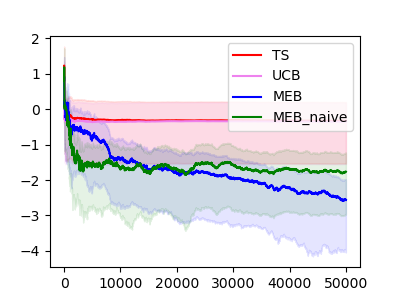
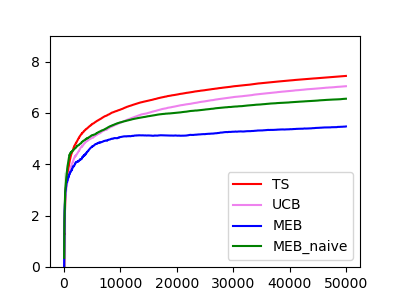

In [53]:
import subprocess
subprocess.call(["python", "RunExp.py", '-T', '50000', '-n', '2',
                 '--scale', '1', '--dist_ops', '0', '-d', '5', '--offset', '5',
                '--save_name', 'tmp', '--sigma', '0.01',# '--decay_cut', '0.5',
                 '--sigma_e', '2.0', '--ind_S', '500', '-p', '0.2', '--save'])
with open('Pickle_files/tmp.pickle', 'rb') as f:
    results, algs, attr, args = pickle.load(f)
oPlot = FlowLayout()
print(args)
save = False
plot_error(results, algs, oPlot, 1, save = save, savename = 'gaussian_p2_se05_s_001')
plot_regret(results, algs, oPlot, log = True, upper = 9, save = save, savename = 'gaussian_p2_se05_s_001')
oPlot.PassHtmlToCell()


Namespace(T=10000, d=5, n=30, a=2, p=0.2, l=1.0, offset=10.0, decay=False, decay_tmp=0.3333333333333333, decay_coef=1, decay_cut=0.0, sigma=0.01, sigma_e=0.5, scale=1.0, dist_ops=0, save_name='gaussian_p2_se05_s_001', theta0=[1, 0, 0, 0, 0], theta1=[0, 1, -1, 1, -1], ind_S=500, save=True)
Algorithm TS: 0.507646
Algorithm UCB: 0.450487
Algorithm MEB: 0.311669
Algorithm MEB_naive: 0.340063


/Users/zipingxu/Desktop/Predicted-context/visualization.py:108: RuntimeWarning: divide by zero encountered in log
  ax.plot(np.arange(T)[sub], np.log(mean)[sub] , color = colors[alg], markersize=0.2, label = alg)
/Users/zipingxu/Desktop/Predicted-context/visualization.py:109: RuntimeWarning: divide by zero encountered in log
  ax.fill_between(np.arange(T)[sub], np.log(mean - sd)[sub], \
/Users/zipingxu/Desktop/Predicted-context/visualization.py:110: RuntimeWarning: divide by zero encountered in log
  np.log(mean + sd)[sub], color = colors[alg], alpha=0.1)



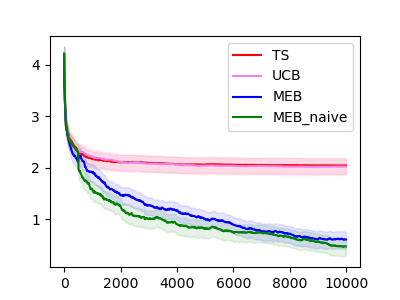
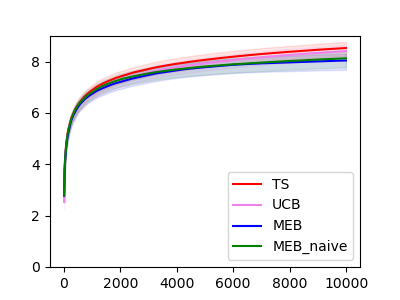

In [34]:
import subprocess
subprocess.call(["python", "RunExp.py", '-T', '10000', '-n', '30',
                 '--scale', '1', '--dist_ops', '0', '-d', '5', '--offset', '10',
                '--save_name', 'gaussian_p2_se05_s_001', '--sigma', '0.01',# '--decay_cut', '0.5',
                 '--sigma_e', '0.5', '--ind_S', '500', '-p', '0.2', '--save'])
with open('Pickle_files/gaussian_p2_se05_s_001.pickle', 'rb') as f:
    results, algs, attr, args = pickle.load(f)
oPlot = FlowLayout()
print(args)
save = True
plot_error(results, algs, oPlot, 1, save = save, savename = 'gaussian_p2_se05_s_001')
plot_regret(results, algs, oPlot, log = True, upper = 9, save = save, savename = 'gaussian_p2_se05_s_001')
oPlot.PassHtmlToCell()

new_gaussian_p2_se0.1_s_0.01
0 1 2 3 4 5 6 7 8 9 Namespace(T=50000, d=5, n=10, a=2, p=0.2, l=1.0, offset=5.0, decay=False, decay_tmp=0.3333333333333333, decay_coef=1, decay_cut=0.0, sigma=0.01, sigma_e=0.1, scale=1.0, dist_ops=0, save_name='new_gaussian_p2_se0.1_s_0.01', theta0=[1, 0, 0, 0, 0], theta1=[0, 1, -1, 1, -1], ind_S=500, save=True)


/Users/xuziping/Desktop/Research/Predicted-context/visualization.py:70: RuntimeWarning: divide by zero encountered in log
  ax.fill_between(np.arange(T)[sub], np.log(mean - sd)[sub], \


Algorithm Adv_UCB: 0.000503, 0.000511


/Users/xuziping/Desktop/Research/Predicted-context/visualization.py:116: RuntimeWarning: divide by zero encountered in log
  ax.plot(np.arange(T)[sub], np.log(mean)[sub] , color = colors[alg], markersize=0.2, label = alg)
/Users/xuziping/Desktop/Research/Predicted-context/visualization.py:117: RuntimeWarning: divide by zero encountered in log
  ax.fill_between(np.arange(T)[sub], np.log(mean - sd)[sub], \
/Users/xuziping/Desktop/Research/Predicted-context/visualization.py:117: RuntimeWarning: invalid value encountered in log
  ax.fill_between(np.arange(T)[sub], np.log(mean - sd)[sub], \
/Users/xuziping/Desktop/Research/Predicted-context/visualization.py:118: RuntimeWarning: divide by zero encountered in log
  np.log(mean + sd)[sub], color = colors[alg], alpha=0.1)



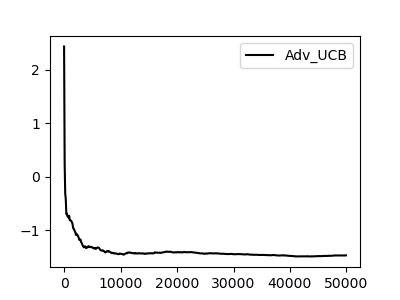
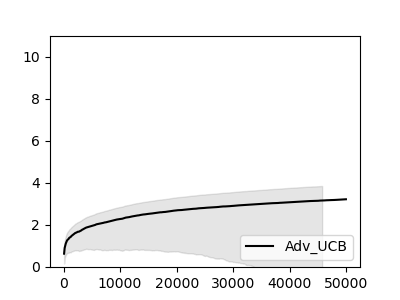

new_gaussian_p2_se0.1_s_0.1
0 1 2 3 4 5 6 7 8 9 Namespace(T=50000, d=5, n=10, a=2, p=0.2, l=1.0, offset=5.0, decay=False, decay_tmp=0.3333333333333333, decay_coef=1, decay_cut=0.0, sigma=0.1, sigma_e=0.1, scale=1.0, dist_ops=0, save_name='new_gaussian_p2_se0.1_s_0.1', theta0=[1, 0, 0, 0, 0], theta1=[0, 1, -1, 1, -1], ind_S=500, save=True)
Algorithm Adv_UCB: 0.000459, 0.000481


/Users/xuziping/Desktop/Research/Predicted-context/visualization.py:70: RuntimeWarning: divide by zero encountered in log
  ax.fill_between(np.arange(T)[sub], np.log(mean - sd)[sub], \
/Users/xuziping/Desktop/Research/Predicted-context/visualization.py:116: RuntimeWarning: divide by zero encountered in log
  ax.plot(np.arange(T)[sub], np.log(mean)[sub] , color = colors[alg], markersize=0.2, label = alg)
/Users/xuziping/Desktop/Research/Predicted-context/visualization.py:117: RuntimeWarning: divide by zero encountered in log
  ax.fill_between(np.arange(T)[sub], np.log(mean - sd)[sub], \
/Users/xuziping/Desktop/Research/Predicted-context/visualization.py:117: RuntimeWarning: invalid value encountered in log
  ax.fill_between(np.arange(T)[sub], np.log(mean - sd)[sub], \
/Users/xuziping/Desktop/Research/Predicted-context/visualization.py:118: RuntimeWarning: divide by zero encountered in log
  np.log(mean + sd)[sub], color = colors[alg], alpha=0.1)



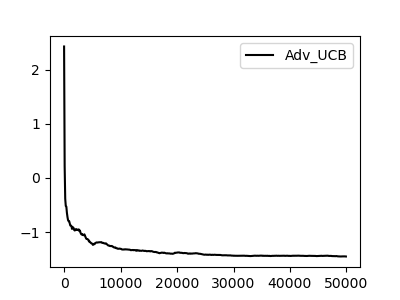
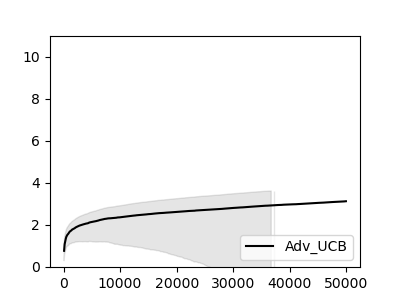

new_gaussian_p2_se0.1_s_1.0
0 1 2 3 4 5 6 7 8 9 Namespace(T=50000, d=5, n=10, a=2, p=0.2, l=1.0, offset=5.0, decay=False, decay_tmp=0.3333333333333333, decay_coef=1, decay_cut=0.0, sigma=1.0, sigma_e=0.1, scale=1.0, dist_ops=0, save_name='new_gaussian_p2_se0.1_s_1.0', theta0=[1, 0, 0, 0, 0], theta1=[0, 1, -1, 1, -1], ind_S=500, save=True)


/Users/xuziping/Desktop/Research/Predicted-context/visualization.py:70: RuntimeWarning: divide by zero encountered in log
  ax.fill_between(np.arange(T)[sub], np.log(mean - sd)[sub], \


Algorithm Adv_UCB: 0.000440, 0.000472


/Users/xuziping/Desktop/Research/Predicted-context/visualization.py:116: RuntimeWarning: divide by zero encountered in log
  ax.plot(np.arange(T)[sub], np.log(mean)[sub] , color = colors[alg], markersize=0.2, label = alg)
/Users/xuziping/Desktop/Research/Predicted-context/visualization.py:117: RuntimeWarning: divide by zero encountered in log
  ax.fill_between(np.arange(T)[sub], np.log(mean - sd)[sub], \
/Users/xuziping/Desktop/Research/Predicted-context/visualization.py:117: RuntimeWarning: invalid value encountered in log
  ax.fill_between(np.arange(T)[sub], np.log(mean - sd)[sub], \
/Users/xuziping/Desktop/Research/Predicted-context/visualization.py:118: RuntimeWarning: divide by zero encountered in log
  np.log(mean + sd)[sub], color = colors[alg], alpha=0.1)



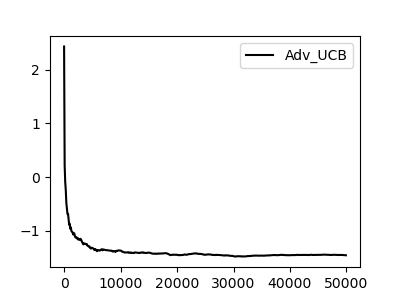
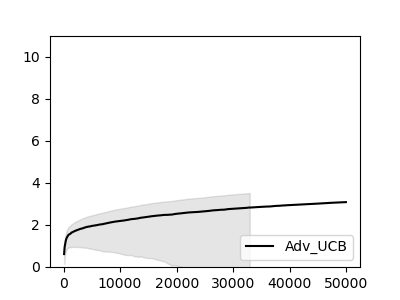

new_gaussian_p2_se1.0_s_0.01
0 1 2 3 4 5 6 7 8 9 Namespace(T=50000, d=5, n=10, a=2, p=0.2, l=1.0, offset=5.0, decay=False, decay_tmp=0.3333333333333333, decay_coef=1, decay_cut=0.0, sigma=0.01, sigma_e=1.0, scale=1.0, dist_ops=0, save_name='new_gaussian_p2_se1.0_s_0.01', theta0=[1, 0, 0, 0, 0], theta1=[0, 1, -1, 1, -1], ind_S=500, save=True)
Algorithm Adv_UCB: 0.006524, 0.004967


/Users/xuziping/Desktop/Research/Predicted-context/visualization.py:70: RuntimeWarning: divide by zero encountered in log
  ax.fill_between(np.arange(T)[sub], np.log(mean - sd)[sub], \
/Users/xuziping/Desktop/Research/Predicted-context/visualization.py:116: RuntimeWarning: divide by zero encountered in log
  ax.plot(np.arange(T)[sub], np.log(mean)[sub] , color = colors[alg], markersize=0.2, label = alg)
/Users/xuziping/Desktop/Research/Predicted-context/visualization.py:117: RuntimeWarning: divide by zero encountered in log
  ax.fill_between(np.arange(T)[sub], np.log(mean - sd)[sub], \
/Users/xuziping/Desktop/Research/Predicted-context/visualization.py:117: RuntimeWarning: invalid value encountered in log
  ax.fill_between(np.arange(T)[sub], np.log(mean - sd)[sub], \
/Users/xuziping/Desktop/Research/Predicted-context/visualization.py:118: RuntimeWarning: divide by zero encountered in log
  np.log(mean + sd)[sub], color = colors[alg], alpha=0.1)



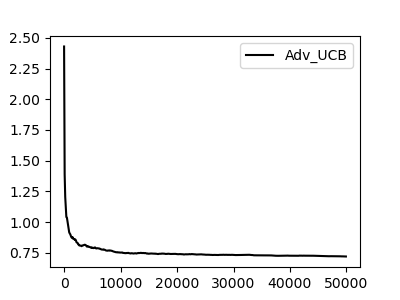
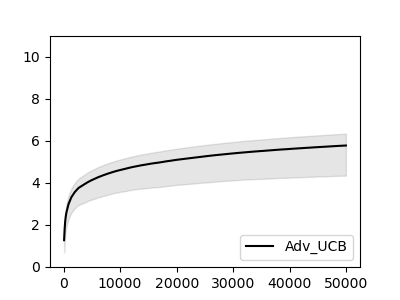

new_gaussian_p2_se1.0_s_0.1
0 1 2 3 4 5 6 7 8 9 Namespace(T=50000, d=5, n=10, a=2, p=0.2, l=1.0, offset=5.0, decay=False, decay_tmp=0.3333333333333333, decay_coef=1, decay_cut=0.0, sigma=0.1, sigma_e=1.0, scale=1.0, dist_ops=0, save_name='new_gaussian_p2_se1.0_s_0.1', theta0=[1, 0, 0, 0, 0], theta1=[0, 1, -1, 1, -1], ind_S=500, save=True)
Algorithm Adv_UCB: 0.007533, 0.005502


/Users/xuziping/Desktop/Research/Predicted-context/visualization.py:70: RuntimeWarning: divide by zero encountered in log
  ax.fill_between(np.arange(T)[sub], np.log(mean - sd)[sub], \
/Users/xuziping/Desktop/Research/Predicted-context/visualization.py:116: RuntimeWarning: divide by zero encountered in log
  ax.plot(np.arange(T)[sub], np.log(mean)[sub] , color = colors[alg], markersize=0.2, label = alg)
/Users/xuziping/Desktop/Research/Predicted-context/visualization.py:117: RuntimeWarning: divide by zero encountered in log
  ax.fill_between(np.arange(T)[sub], np.log(mean - sd)[sub], \
/Users/xuziping/Desktop/Research/Predicted-context/visualization.py:117: RuntimeWarning: invalid value encountered in log
  ax.fill_between(np.arange(T)[sub], np.log(mean - sd)[sub], \
/Users/xuziping/Desktop/Research/Predicted-context/visualization.py:118: RuntimeWarning: divide by zero encountered in log
  np.log(mean + sd)[sub], color = colors[alg], alpha=0.1)



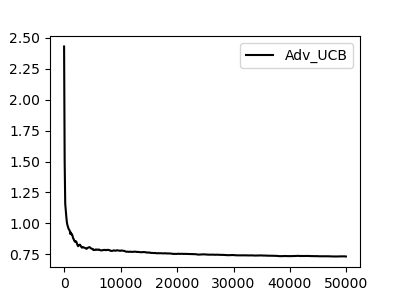
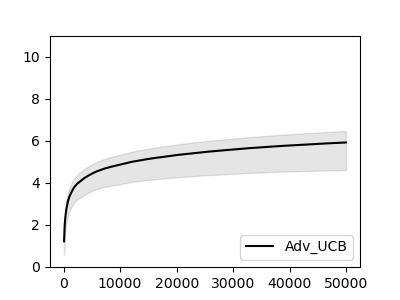

new_gaussian_p2_se1.0_s_1.0
0 1 2 3 4 5 6 7 8 9 Namespace(T=50000, d=5, n=10, a=2, p=0.2, l=1.0, offset=5.0, decay=False, decay_tmp=0.3333333333333333, decay_coef=1, decay_cut=0.0, sigma=1.0, sigma_e=1.0, scale=1.0, dist_ops=0, save_name='new_gaussian_p2_se1.0_s_1.0', theta0=[1, 0, 0, 0, 0], theta1=[0, 1, -1, 1, -1], ind_S=500, save=True)
Algorithm Adv_UCB: 0.005889, 0.004758


/Users/xuziping/Desktop/Research/Predicted-context/visualization.py:70: RuntimeWarning: divide by zero encountered in log
  ax.fill_between(np.arange(T)[sub], np.log(mean - sd)[sub], \
/Users/xuziping/Desktop/Research/Predicted-context/visualization.py:116: RuntimeWarning: divide by zero encountered in log
  ax.plot(np.arange(T)[sub], np.log(mean)[sub] , color = colors[alg], markersize=0.2, label = alg)
/Users/xuziping/Desktop/Research/Predicted-context/visualization.py:117: RuntimeWarning: divide by zero encountered in log
  ax.fill_between(np.arange(T)[sub], np.log(mean - sd)[sub], \
/Users/xuziping/Desktop/Research/Predicted-context/visualization.py:118: RuntimeWarning: divide by zero encountered in log
  np.log(mean + sd)[sub], color = colors[alg], alpha=0.1)



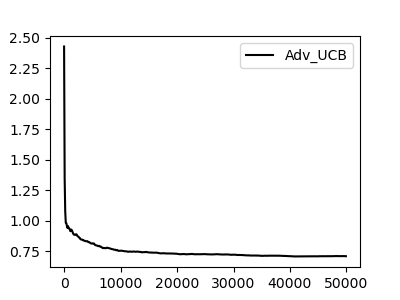
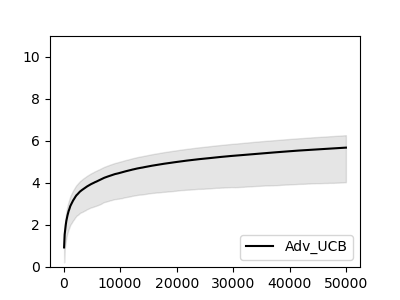

new_gaussian_p2_se2.0_s_0.01
0 1 2 3 4 5 6 7 8 9 Namespace(T=50000, d=5, n=10, a=2, p=0.2, l=1.0, offset=5.0, decay=False, decay_tmp=0.3333333333333333, decay_coef=1, decay_cut=0.0, sigma=0.01, sigma_e=2.0, scale=1.0, dist_ops=0, save_name='new_gaussian_p2_se2.0_s_0.01', theta0=[1, 0, 0, 0, 0], theta1=[0, 1, -1, 1, -1], ind_S=500, save=True)
Algorithm Adv_UCB: 0.016082, 0.010245


/Users/xuziping/Desktop/Research/Predicted-context/visualization.py:70: RuntimeWarning: divide by zero encountered in log
  ax.fill_between(np.arange(T)[sub], np.log(mean - sd)[sub], \
/Users/xuziping/Desktop/Research/Predicted-context/visualization.py:116: RuntimeWarning: divide by zero encountered in log
  ax.plot(np.arange(T)[sub], np.log(mean)[sub] , color = colors[alg], markersize=0.2, label = alg)
/Users/xuziping/Desktop/Research/Predicted-context/visualization.py:117: RuntimeWarning: divide by zero encountered in log
  ax.fill_between(np.arange(T)[sub], np.log(mean - sd)[sub], \
/Users/xuziping/Desktop/Research/Predicted-context/visualization.py:118: RuntimeWarning: divide by zero encountered in log
  np.log(mean + sd)[sub], color = colors[alg], alpha=0.1)



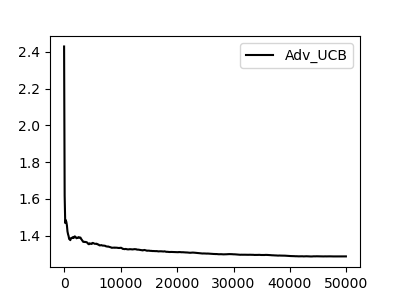
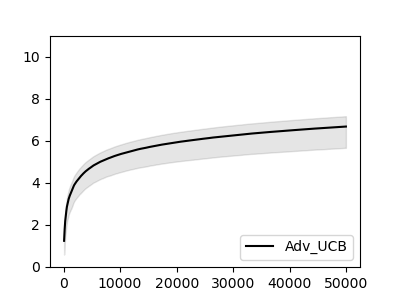

new_gaussian_p2_se2.0_s_0.1
0 1 2 3 4 5 6 7 8 9 Namespace(T=50000, d=5, n=10, a=2, p=0.2, l=1.0, offset=5.0, decay=False, decay_tmp=0.3333333333333333, decay_coef=1, decay_cut=0.0, sigma=0.1, sigma_e=2.0, scale=1.0, dist_ops=0, save_name='new_gaussian_p2_se2.0_s_0.1', theta0=[1, 0, 0, 0, 0], theta1=[0, 1, -1, 1, -1], ind_S=500, save=True)


/Users/xuziping/Desktop/Research/Predicted-context/visualization.py:70: RuntimeWarning: divide by zero encountered in log
  ax.fill_between(np.arange(T)[sub], np.log(mean - sd)[sub], \
/Users/xuziping/Desktop/Research/Predicted-context/visualization.py:116: RuntimeWarning: divide by zero encountered in log
  ax.plot(np.arange(T)[sub], np.log(mean)[sub] , color = colors[alg], markersize=0.2, label = alg)
/Users/xuziping/Desktop/Research/Predicted-context/visualization.py:117: RuntimeWarning: divide by zero encountered in log
  ax.fill_between(np.arange(T)[sub], np.log(mean - sd)[sub], \
/Users/xuziping/Desktop/Research/Predicted-context/visualization.py:118: RuntimeWarning: divide by zero encountered in log
  np.log(mean + sd)[sub], color = colors[alg], alpha=0.1)


Algorithm Adv_UCB: 0.010647, 0.007911



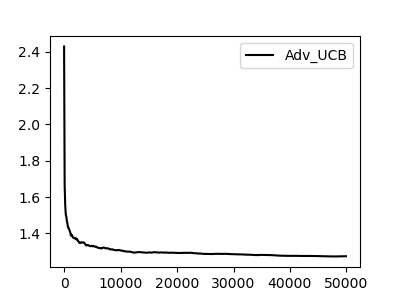
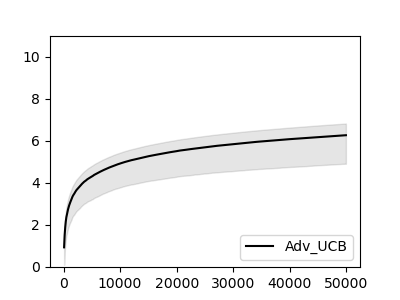

new_gaussian_p2_se2.0_s_1.0
0 1 2 3 4 5 6 7 8 9 Namespace(T=50000, d=5, n=10, a=2, p=0.2, l=1.0, offset=5.0, decay=False, decay_tmp=0.3333333333333333, decay_coef=1, decay_cut=0.0, sigma=1.0, sigma_e=2.0, scale=1.0, dist_ops=0, save_name='new_gaussian_p2_se2.0_s_1.0', theta0=[1, 0, 0, 0, 0], theta1=[0, 1, -1, 1, -1], ind_S=500, save=True)
Algorithm Adv_UCB: 0.018808, 0.011454


/Users/xuziping/Desktop/Research/Predicted-context/visualization.py:70: RuntimeWarning: divide by zero encountered in log
  ax.fill_between(np.arange(T)[sub], np.log(mean - sd)[sub], \
/Users/xuziping/Desktop/Research/Predicted-context/visualization.py:116: RuntimeWarning: divide by zero encountered in log
  ax.plot(np.arange(T)[sub], np.log(mean)[sub] , color = colors[alg], markersize=0.2, label = alg)
/Users/xuziping/Desktop/Research/Predicted-context/visualization.py:117: RuntimeWarning: divide by zero encountered in log
  ax.fill_between(np.arange(T)[sub], np.log(mean - sd)[sub], \
/Users/xuziping/Desktop/Research/Predicted-context/visualization.py:117: RuntimeWarning: invalid value encountered in log
  ax.fill_between(np.arange(T)[sub], np.log(mean - sd)[sub], \
/Users/xuziping/Desktop/Research/Predicted-context/visualization.py:118: RuntimeWarning: divide by zero encountered in log
  np.log(mean + sd)[sub], color = colors[alg], alpha=0.1)



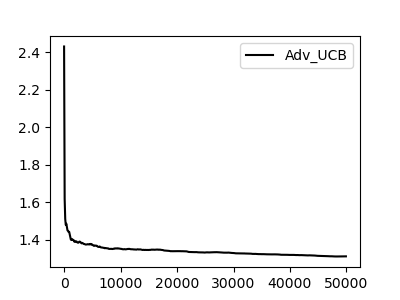
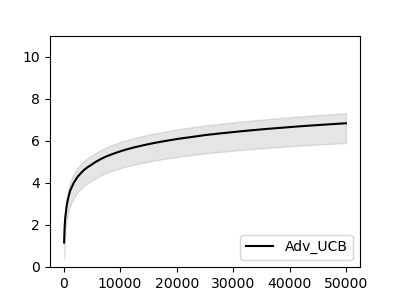

IndexError: list index out of range

In [2]:
import subprocess
import os
import pickle


se_list = [0.1, 1.0, 2.0]
s_list = [0.01, 0.1, 1.0]
res_m = []
res_s = []
for se in se_list:
    for s in s_list:

        save_name = 'new_gaussian_p2_se%s_s_%s'%(str(se), str(s))
        print(save_name)
#         if not os.path.exists('Pickle_files/%s.pickle'%(save_name)):
        subprocess.call(["python", "RunExp.py", '-T', '50000', '-n', '10',
                         '--scale', '1', '--dist_ops', '0', '-d', '5', '--offset', '5',
                        '--save_name', save_name, '--sigma', str(s), # '--decay_cut', '0.5',
                         '--sigma_e', str(se), '--ind_S', '500', '-p', '0.2', '--save'])
        with open('Pickle_files/%s.pickle'%(save_name), 'rb') as f:
            results, algs, attr, args = pickle.load(f)
        oPlot = FlowLayout()
        print(args)
        save = True
        plot_error(results, algs, oPlot, 1, save = save, savename = save_name, sub_sampling = 100)
        m, s = plot_regret(results, algs, oPlot, log = True, upper = 11, save = save, savename = save_name, sub_sampling = 100)
        oPlot.PassHtmlToCell()
        res_m.append(m)
        res_s.append(s)
i = 0
for se in se_list:
    for s in s_list:
        res = ','.join(map(lambda j: '%.3f' % (res_m[i][j]) + ' (%.3f)' % (res_s[i][j]), range(4)))
        print(s, ',', se, ',', res)
        i += 1

gaussian_p2_se0.1_s_0.01
Namespace(T=50000, d=5, n=100, a=2, p=0.2, l=1.0, offset=5.0, decay=False, decay_tmp=0.3333333333333333, decay_coef=1, decay_cut=0.0, sigma=0.01, sigma_e=0.1, scale=1.0, dist_ops=0, save_name='gaussian_p2_se0.1_s_0.01', theta0=[1, 0, 0, 0, 0], theta1=[0, 1, -1, 1, -1], ind_S=500, save=True)
Algorithm TS: 0.046943, 0.014726
Algorithm UCB: 0.045965, 0.014574
Algorithm MEB: 0.027160, 0.011233
Algorithm MEB_naive: 0.038282, 0.013297


/Users/xuziping/Desktop/Research/Predicted-context/visualization.py:69: RuntimeWarning: divide by zero encountered in log
  ax.fill_between(np.arange(T)[sub], np.log(mean - sd)[sub], \
/Users/xuziping/Desktop/Research/Predicted-context/visualization.py:115: RuntimeWarning: divide by zero encountered in log
  ax.plot(np.arange(T)[sub], np.log(mean)[sub] , color = colors[alg], markersize=0.2, label = alg)
/Users/xuziping/Desktop/Research/Predicted-context/visualization.py:116: RuntimeWarning: divide by zero encountered in log
  ax.fill_between(np.arange(T)[sub], np.log(mean - sd)[sub], \
/Users/xuziping/Desktop/Research/Predicted-context/visualization.py:117: RuntimeWarning: divide by zero encountered in log
  np.log(mean + sd)[sub], color = colors[alg], alpha=0.1)



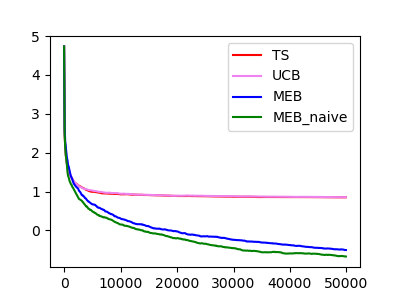
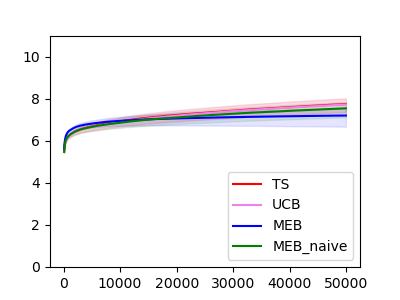

gaussian_p2_se0.1_s_0.1
Namespace(T=50000, d=5, n=100, a=2, p=0.2, l=1.0, offset=5.0, decay=False, decay_tmp=0.3333333333333333, decay_coef=1, decay_cut=0.0, sigma=0.1, sigma_e=0.1, scale=1.0, dist_ops=0, save_name='gaussian_p2_se0.1_s_0.1', theta0=[1, 0, 0, 0, 0], theta1=[0, 1, -1, 1, -1], ind_S=500, save=True)
Algorithm TS: 0.046655, 0.014671
Algorithm UCB: 0.047212, 0.014731
Algorithm MEB: 0.026058, 0.010973
Algorithm MEB_naive: 0.038876, 0.013375


/Users/xuziping/Desktop/Research/Predicted-context/visualization.py:69: RuntimeWarning: divide by zero encountered in log
  ax.fill_between(np.arange(T)[sub], np.log(mean - sd)[sub], \
/Users/xuziping/Desktop/Research/Predicted-context/visualization.py:115: RuntimeWarning: divide by zero encountered in log
  ax.plot(np.arange(T)[sub], np.log(mean)[sub] , color = colors[alg], markersize=0.2, label = alg)
/Users/xuziping/Desktop/Research/Predicted-context/visualization.py:116: RuntimeWarning: divide by zero encountered in log
  ax.fill_between(np.arange(T)[sub], np.log(mean - sd)[sub], \
/Users/xuziping/Desktop/Research/Predicted-context/visualization.py:117: RuntimeWarning: divide by zero encountered in log
  np.log(mean + sd)[sub], color = colors[alg], alpha=0.1)



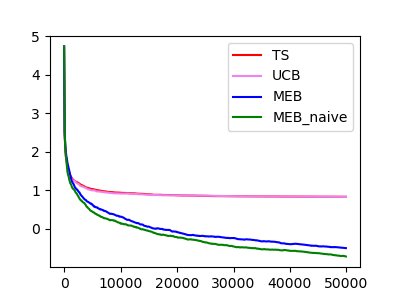
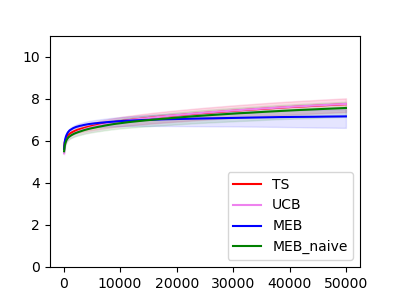

gaussian_p2_se0.1_s_1.0
Namespace(T=50000, d=5, n=100, a=2, p=0.2, l=1.0, offset=5.0, decay=False, decay_tmp=0.3333333333333333, decay_coef=1, decay_cut=0.0, sigma=1.0, sigma_e=0.1, scale=1.0, dist_ops=0, save_name='gaussian_p2_se0.1_s_1.0', theta0=[1, 0, 0, 0, 0], theta1=[0, 1, -1, 1, -1], ind_S=500, save=True)
Algorithm TS: 0.047650, 0.014840
Algorithm UCB: 0.047858, 0.014852
Algorithm MEB: 0.027390, 0.011252
Algorithm MEB_naive: 0.038036, 0.013260


/Users/xuziping/Desktop/Research/Predicted-context/visualization.py:69: RuntimeWarning: divide by zero encountered in log
  ax.fill_between(np.arange(T)[sub], np.log(mean - sd)[sub], \
/Users/xuziping/Desktop/Research/Predicted-context/visualization.py:115: RuntimeWarning: divide by zero encountered in log
  ax.plot(np.arange(T)[sub], np.log(mean)[sub] , color = colors[alg], markersize=0.2, label = alg)
/Users/xuziping/Desktop/Research/Predicted-context/visualization.py:116: RuntimeWarning: divide by zero encountered in log
  ax.fill_between(np.arange(T)[sub], np.log(mean - sd)[sub], \
/Users/xuziping/Desktop/Research/Predicted-context/visualization.py:117: RuntimeWarning: divide by zero encountered in log
  np.log(mean + sd)[sub], color = colors[alg], alpha=0.1)



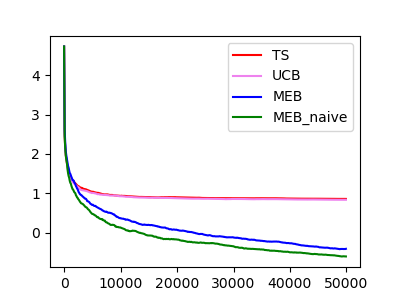
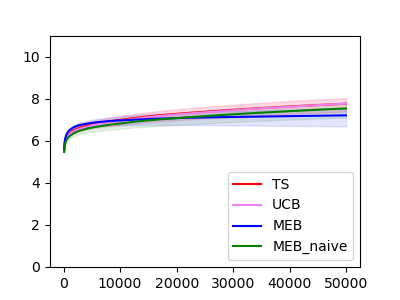

gaussian_p2_se1.0_s_0.01


/Users/xuziping/Desktop/Research/Predicted-context/visualization.py:69: RuntimeWarning: divide by zero encountered in log
  ax.fill_between(np.arange(T)[sub], np.log(mean - sd)[sub], \


Namespace(T=50000, d=5, n=100, a=2, p=0.2, l=1.0, offset=5.0, decay=False, decay_tmp=0.3333333333333333, decay_coef=1, decay_cut=0.0, sigma=0.01, sigma_e=1.0, scale=1.0, dist_ops=0, save_name='gaussian_p2_se1.0_s_0.01', theta0=[1, 0, 0, 0, 0], theta1=[0, 1, -1, 1, -1], ind_S=500, save=True)
Algorithm TS: 0.757107, 0.163944
Algorithm UCB: 0.647085, 0.145483
Algorithm MEB: 0.198285, 0.078724
Algorithm MEB_naive: 0.371039, 0.106949


/Users/xuziping/Desktop/Research/Predicted-context/visualization.py:115: RuntimeWarning: divide by zero encountered in log
  ax.plot(np.arange(T)[sub], np.log(mean)[sub] , color = colors[alg], markersize=0.2, label = alg)
/Users/xuziping/Desktop/Research/Predicted-context/visualization.py:116: RuntimeWarning: divide by zero encountered in log
  ax.fill_between(np.arange(T)[sub], np.log(mean - sd)[sub], \
/Users/xuziping/Desktop/Research/Predicted-context/visualization.py:117: RuntimeWarning: divide by zero encountered in log
  np.log(mean + sd)[sub], color = colors[alg], alpha=0.1)



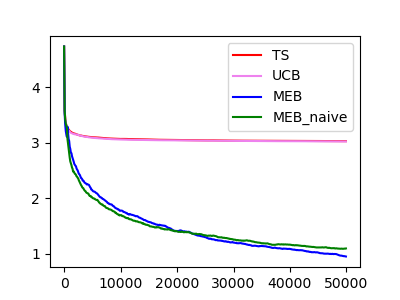
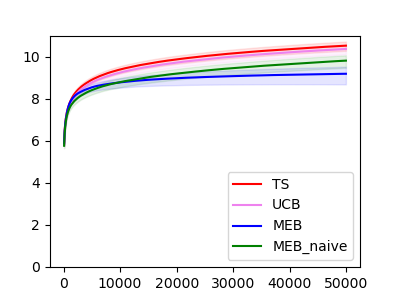

/Users/xuziping/Desktop/Research/Predicted-context/visualization.py:69: RuntimeWarning: divide by zero encountered in log
  ax.fill_between(np.arange(T)[sub], np.log(mean - sd)[sub], \


gaussian_p2_se1.0_s_0.1
Namespace(T=50000, d=5, n=100, a=2, p=0.2, l=1.0, offset=5.0, decay=False, decay_tmp=0.3333333333333333, decay_coef=1, decay_cut=0.0, sigma=0.1, sigma_e=1.0, scale=1.0, dist_ops=0, save_name='gaussian_p2_se1.0_s_0.1', theta0=[1, 0, 0, 0, 0], theta1=[0, 1, -1, 1, -1], ind_S=500, save=True)
Algorithm TS: 0.768560, 0.159742
Algorithm UCB: 0.720784, 0.155639
Algorithm MEB: 0.204772, 0.079745
Algorithm MEB_naive: 0.392474, 0.110089


/Users/xuziping/Desktop/Research/Predicted-context/visualization.py:115: RuntimeWarning: divide by zero encountered in log
  ax.plot(np.arange(T)[sub], np.log(mean)[sub] , color = colors[alg], markersize=0.2, label = alg)
/Users/xuziping/Desktop/Research/Predicted-context/visualization.py:116: RuntimeWarning: divide by zero encountered in log
  ax.fill_between(np.arange(T)[sub], np.log(mean - sd)[sub], \
/Users/xuziping/Desktop/Research/Predicted-context/visualization.py:117: RuntimeWarning: divide by zero encountered in log
  np.log(mean + sd)[sub], color = colors[alg], alpha=0.1)



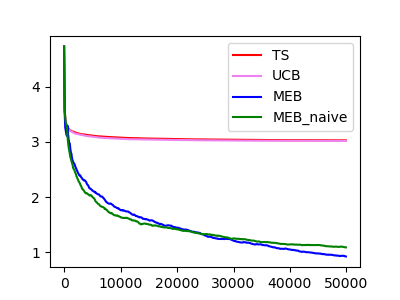
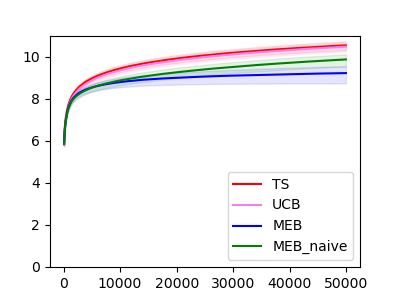

/Users/xuziping/Desktop/Research/Predicted-context/visualization.py:69: RuntimeWarning: divide by zero encountered in log
  ax.fill_between(np.arange(T)[sub], np.log(mean - sd)[sub], \


gaussian_p2_se1.0_s_1.0
Namespace(T=50000, d=5, n=100, a=2, p=0.2, l=1.0, offset=5.0, decay=False, decay_tmp=0.3333333333333333, decay_coef=1, decay_cut=0.0, sigma=1.0, sigma_e=1.0, scale=1.0, dist_ops=0, save_name='gaussian_p2_se1.0_s_1.0', theta0=[1, 0, 0, 0, 0], theta1=[0, 1, -1, 1, -1], ind_S=500, save=True)
Algorithm TS: 0.714183, 0.155337
Algorithm UCB: 0.696852, 0.150215
Algorithm MEB: 0.218465, 0.082652
Algorithm MEB_naive: 0.404098, 0.111652


/Users/xuziping/Desktop/Research/Predicted-context/visualization.py:115: RuntimeWarning: divide by zero encountered in log
  ax.plot(np.arange(T)[sub], np.log(mean)[sub] , color = colors[alg], markersize=0.2, label = alg)
/Users/xuziping/Desktop/Research/Predicted-context/visualization.py:116: RuntimeWarning: divide by zero encountered in log
  ax.fill_between(np.arange(T)[sub], np.log(mean - sd)[sub], \
/Users/xuziping/Desktop/Research/Predicted-context/visualization.py:117: RuntimeWarning: divide by zero encountered in log
  np.log(mean + sd)[sub], color = colors[alg], alpha=0.1)



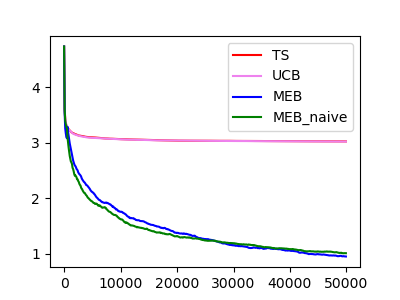
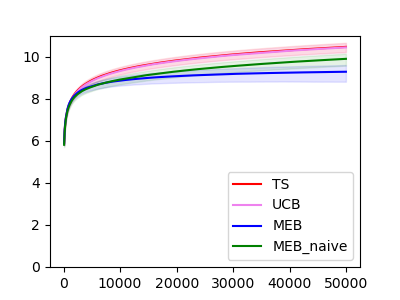

gaussian_p2_se2.0_s_0.01


/Users/xuziping/Desktop/Research/Predicted-context/visualization.py:69: RuntimeWarning: divide by zero encountered in log
  ax.fill_between(np.arange(T)[sub], np.log(mean - sd)[sub], \


Namespace(T=50000, d=5, n=100, a=2, p=0.2, l=1.0, offset=5.0, decay=False, decay_tmp=0.3333333333333333, decay_coef=1, decay_cut=0.0, sigma=0.01, sigma_e=2.0, scale=1.0, dist_ops=0, save_name='gaussian_p2_se2.0_s_0.01', theta0=[1, 0, 0, 0, 0], theta1=[0, 1, -1, 1, -1], ind_S=500, save=True)
Algorithm TS: 1.491568, 0.280910
Algorithm UCB: 1.504452, 0.283268
Algorithm MEB: 0.358353, 0.129021
Algorithm MEB_naive: 0.616196, 0.168665


/Users/xuziping/Desktop/Research/Predicted-context/visualization.py:115: RuntimeWarning: divide by zero encountered in log
  ax.plot(np.arange(T)[sub], np.log(mean)[sub] , color = colors[alg], markersize=0.2, label = alg)
/Users/xuziping/Desktop/Research/Predicted-context/visualization.py:116: RuntimeWarning: divide by zero encountered in log
  ax.fill_between(np.arange(T)[sub], np.log(mean - sd)[sub], \
/Users/xuziping/Desktop/Research/Predicted-context/visualization.py:117: RuntimeWarning: divide by zero encountered in log
  np.log(mean + sd)[sub], color = colors[alg], alpha=0.1)



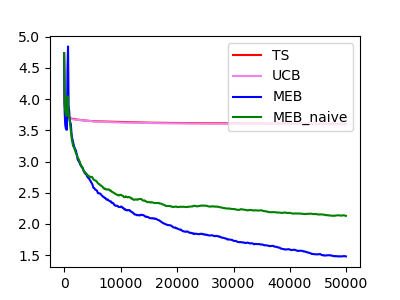
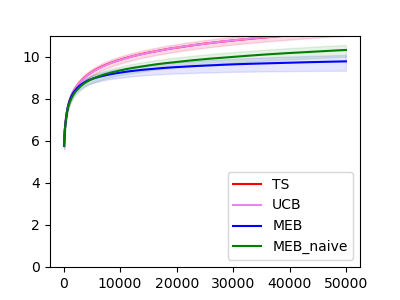

/Users/xuziping/Desktop/Research/Predicted-context/visualization.py:69: RuntimeWarning: divide by zero encountered in log
  ax.fill_between(np.arange(T)[sub], np.log(mean - sd)[sub], \


gaussian_p2_se2.0_s_0.1
Namespace(T=50000, d=5, n=100, a=2, p=0.2, l=1.0, offset=5.0, decay=False, decay_tmp=0.3333333333333333, decay_coef=1, decay_cut=0.0, sigma=0.1, sigma_e=2.0, scale=1.0, dist_ops=0, save_name='gaussian_p2_se2.0_s_0.1', theta0=[1, 0, 0, 0, 0], theta1=[0, 1, -1, 1, -1], ind_S=500, save=True)
Algorithm TS: 1.195346, 0.244355
Algorithm UCB: 1.333267, 0.260083
Algorithm MEB: 0.368099, 0.130833
Algorithm MEB_naive: 0.584044, 0.163821


/Users/xuziping/Desktop/Research/Predicted-context/visualization.py:115: RuntimeWarning: divide by zero encountered in log
  ax.plot(np.arange(T)[sub], np.log(mean)[sub] , color = colors[alg], markersize=0.2, label = alg)
/Users/xuziping/Desktop/Research/Predicted-context/visualization.py:116: RuntimeWarning: divide by zero encountered in log
  ax.fill_between(np.arange(T)[sub], np.log(mean - sd)[sub], \
/Users/xuziping/Desktop/Research/Predicted-context/visualization.py:117: RuntimeWarning: divide by zero encountered in log
  np.log(mean + sd)[sub], color = colors[alg], alpha=0.1)



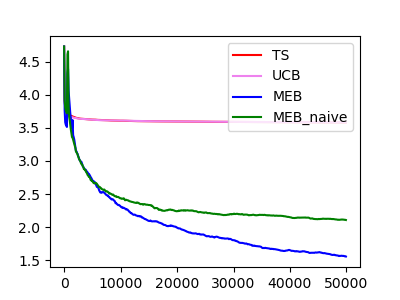
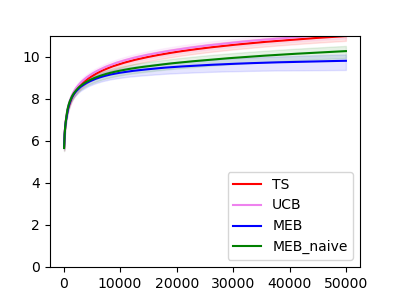

gaussian_p2_se2.0_s_1.0
Namespace(T=50000, d=5, n=100, a=2, p=0.2, l=1.0, offset=5.0, decay=False, decay_tmp=0.3333333333333333, decay_coef=1, decay_cut=0.0, sigma=1.0, sigma_e=2.0, scale=1.0, dist_ops=0, save_name='gaussian_p2_se2.0_s_1.0', theta0=[1, 0, 0, 0, 0], theta1=[0, 1, -1, 1, -1], ind_S=500, save=True)
Algorithm TS: 1.298660, 0.256821
Algorithm UCB: 1.476288, 0.277470
Algorithm MEB: 0.415940, 0.139455
Algorithm MEB_naive: 0.625456, 0.169696


/Users/xuziping/Desktop/Research/Predicted-context/visualization.py:69: RuntimeWarning: divide by zero encountered in log
  ax.fill_between(np.arange(T)[sub], np.log(mean - sd)[sub], \
/Users/xuziping/Desktop/Research/Predicted-context/visualization.py:115: RuntimeWarning: divide by zero encountered in log
  ax.plot(np.arange(T)[sub], np.log(mean)[sub] , color = colors[alg], markersize=0.2, label = alg)
/Users/xuziping/Desktop/Research/Predicted-context/visualization.py:116: RuntimeWarning: divide by zero encountered in log
  ax.fill_between(np.arange(T)[sub], np.log(mean - sd)[sub], \
/Users/xuziping/Desktop/Research/Predicted-context/visualization.py:117: RuntimeWarning: divide by zero encountered in log
  np.log(mean + sd)[sub], color = colors[alg], alpha=0.1)



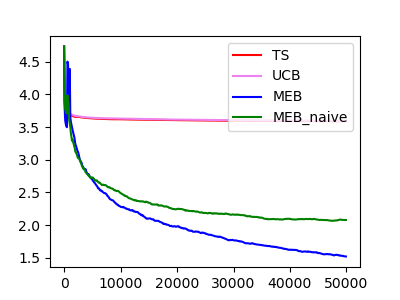
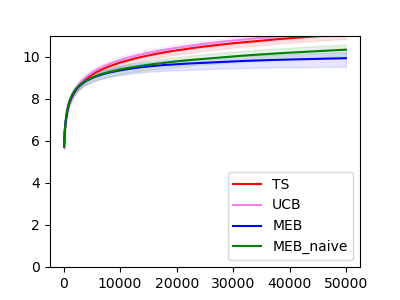

0.01 , 0.1 , 0.047 (0.015),0.046 (0.015),0.027 (0.011),0.038 (0.013)
0.1 , 0.1 , 0.047 (0.015),0.047 (0.015),0.026 (0.011),0.039 (0.013)
1.0 , 0.1 , 0.048 (0.015),0.048 (0.015),0.027 (0.011),0.038 (0.013)
0.01 , 1.0 , 0.757 (0.164),0.647 (0.145),0.198 (0.079),0.371 (0.107)
0.1 , 1.0 , 0.769 (0.160),0.721 (0.156),0.205 (0.080),0.392 (0.110)
1.0 , 1.0 , 0.714 (0.155),0.697 (0.150),0.218 (0.083),0.404 (0.112)
0.01 , 2.0 , 1.492 (0.281),1.504 (0.283),0.358 (0.129),0.616 (0.169)
0.1 , 2.0 , 1.195 (0.244),1.333 (0.260),0.368 (0.131),0.584 (0.164)
1.0 , 2.0 , 1.299 (0.257),1.476 (0.277),0.416 (0.139),0.625 (0.170)


In [8]:
import subprocess
import os
import pickle


se_list = [0.1, 1.0, 2.0]
s_list = [0.01, 0.1, 1.0]
res_m = []
res_s = []
for se in se_list:
    for s in s_list:

        save_name = 'gaussian_p2_se%s_s_%s'%(str(se), str(s))
        print(save_name)
        if not os.path.exists('Pickle_files/%s.pickle'%(save_name)):
            subprocess.call(["python", "RunExp.py", '-T', '50000', '-n', '10',
                         '--scale', '1', '--dist_ops', '3', '-d', '5', '--offset', '5',
                        '--save_name', save_name, '--sigma', str(s),# '--decay_cut', '0.5',
                         '--sigma_e', str(se), '--ind_S', '500', '-p', '0.2', '--save'])
        with open('Pickle_files/%s.pickle'%(save_name), 'rb') as f:
            results, algs, attr, args = pickle.load(f)
        oPlot = FlowLayout()
        print(args)
        save = True
        plot_error(results, algs, oPlot, 1, save = save, savename = save_name, sub_sampling = 100)
        m, s = plot_regret(results, algs, oPlot, log = True, upper = 11, save = save, savename = save_name, sub_sampling = 100)
        oPlot.PassHtmlToCell()
        res_m.append(m)
        res_s.append(s)
i = 0
for se in se_list:
    for s in s_list:
        res = ','.join(map(lambda j: '%.3f' % (res_m[i][j]) + ' (%.3f)' % (res_s[i][j]), range(4)))
        print(s, ',', se, ',', res)
        i += 1

Namespace(T=5000, n=100, a=2, p=0.5, l=1.0, C=1.0, decay=False, decay_tmp=0.3333333333333333, decay_coef=1, decay_cut=0.5, sigma=0.05, sigma_e=0.1, dist_ops=0, save_name='gaussian_p2_se0.1_s_0.05', ind_S=100, save=True)
Algorithm TS: 0.026709, 0.066976
Algorithm UCB: 0.027333, 0.069576
Algorithm MEB: 0.022447, 0.057220
Algorithm MEB_naive: 0.023714, 0.058189


/Users/xuziping/Desktop/Research/Predicted-context/visualization.py:69: RuntimeWarning: divide by zero encountered in log
  ax.fill_between(np.arange(T)[sub], np.log(mean - sd)[sub], \
/Users/xuziping/Desktop/Research/Predicted-context/visualization.py:115: RuntimeWarning: divide by zero encountered in log
  ax.plot(np.arange(T)[sub], np.log(mean)[sub] , color = colors[alg], markersize=0.2, label = alg)
/Users/xuziping/Desktop/Research/Predicted-context/visualization.py:116: RuntimeWarning: divide by zero encountered in log
  ax.fill_between(np.arange(T)[sub], np.log(mean - sd)[sub], \
/Users/xuziping/Desktop/Research/Predicted-context/visualization.py:116: RuntimeWarning: invalid value encountered in log
  ax.fill_between(np.arange(T)[sub], np.log(mean - sd)[sub], \
/Users/xuziping/Desktop/Research/Predicted-context/visualization.py:117: RuntimeWarning: divide by zero encountered in log
  np.log(mean + sd)[sub], color = colors[alg], alpha=0.1)



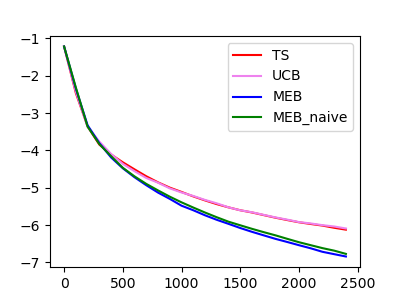
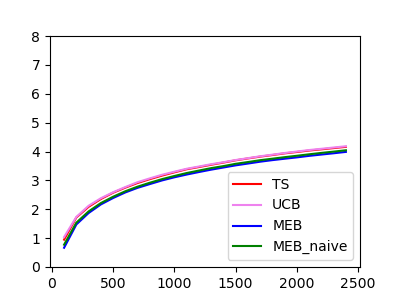

/Users/xuziping/Desktop/Research/Predicted-context/visualization.py:69: RuntimeWarning: divide by zero encountered in log
  ax.fill_between(np.arange(T)[sub], np.log(mean - sd)[sub], \


Namespace(T=5000, n=100, a=2, p=0.5, l=1.0, C=1.0, decay=False, decay_tmp=0.3333333333333333, decay_coef=1, decay_cut=0.5, sigma=0.1, sigma_e=0.1, dist_ops=0, save_name='gaussian_p2_se0.1_s_0.1', ind_S=100, save=True)
Algorithm TS: 0.025915, 0.057423
Algorithm UCB: 0.023938, 0.053274
Algorithm MEB: 0.019503, 0.046345
Algorithm MEB_naive: 0.019842, 0.046390


/Users/xuziping/Desktop/Research/Predicted-context/visualization.py:115: RuntimeWarning: divide by zero encountered in log
  ax.plot(np.arange(T)[sub], np.log(mean)[sub] , color = colors[alg], markersize=0.2, label = alg)
/Users/xuziping/Desktop/Research/Predicted-context/visualization.py:116: RuntimeWarning: divide by zero encountered in log
  ax.fill_between(np.arange(T)[sub], np.log(mean - sd)[sub], \
/Users/xuziping/Desktop/Research/Predicted-context/visualization.py:116: RuntimeWarning: invalid value encountered in log
  ax.fill_between(np.arange(T)[sub], np.log(mean - sd)[sub], \
/Users/xuziping/Desktop/Research/Predicted-context/visualization.py:117: RuntimeWarning: divide by zero encountered in log
  np.log(mean + sd)[sub], color = colors[alg], alpha=0.1)



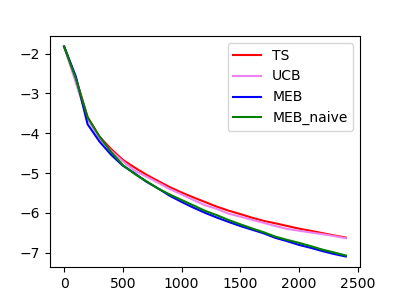
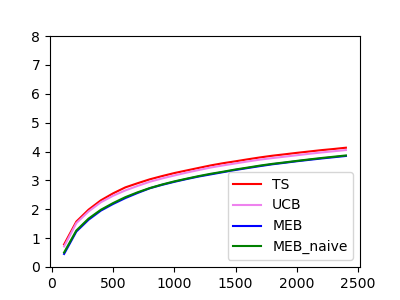

Namespace(T=5000, n=100, a=2, p=0.5, l=1.0, C=1.0, decay=False, decay_tmp=0.3333333333333333, decay_coef=1, decay_cut=0.5, sigma=5.0, sigma_e=0.1, dist_ops=0, save_name='gaussian_p2_se0.1_s_5.0', ind_S=100, save=True)


/Users/xuziping/Desktop/Research/Predicted-context/visualization.py:69: RuntimeWarning: divide by zero encountered in log
  ax.fill_between(np.arange(T)[sub], np.log(mean - sd)[sub], \
/Users/xuziping/Desktop/Research/Predicted-context/visualization.py:115: RuntimeWarning: divide by zero encountered in log
  ax.plot(np.arange(T)[sub], np.log(mean)[sub] , color = colors[alg], markersize=0.2, label = alg)
/Users/xuziping/Desktop/Research/Predicted-context/visualization.py:116: RuntimeWarning: divide by zero encountered in log
  ax.fill_between(np.arange(T)[sub], np.log(mean - sd)[sub], \
/Users/xuziping/Desktop/Research/Predicted-context/visualization.py:116: RuntimeWarning: invalid value encountered in log
  ax.fill_between(np.arange(T)[sub], np.log(mean - sd)[sub], \
/Users/xuziping/Desktop/Research/Predicted-context/visualization.py:117: RuntimeWarning: divide by zero encountered in log
  np.log(mean + sd)[sub], color = colors[alg], alpha=0.1)


Algorithm TS: 1.029561, 0.287239
Algorithm UCB: 0.743361, 0.261703
Algorithm MEB: 0.830943, 0.266968
Algorithm MEB_naive: 1.173214, 0.343322



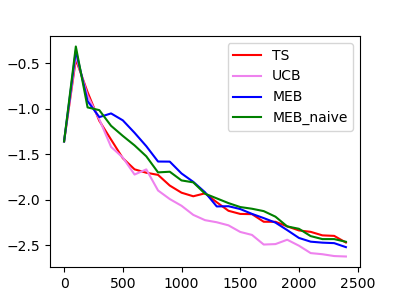
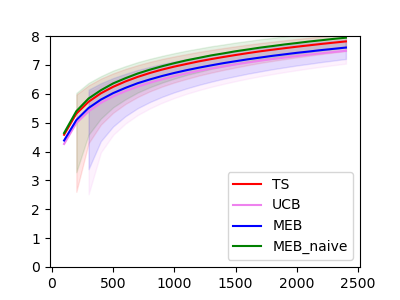

Namespace(T=5000, n=100, a=2, p=0.5, l=1.0, C=1.0, decay=False, decay_tmp=0.3333333333333333, decay_coef=1, decay_cut=0.5, sigma=0.05, sigma_e=1.0, dist_ops=0, save_name='gaussian_p2_se1.0_s_0.05', ind_S=100, save=True)


/Users/xuziping/Desktop/Research/Predicted-context/visualization.py:69: RuntimeWarning: divide by zero encountered in log
  ax.fill_between(np.arange(T)[sub], np.log(mean - sd)[sub], \


Algorithm TS: 0.412074, 0.354540
Algorithm UCB: 0.408211, 0.351043
Algorithm MEB: 0.116913, 0.147795
Algorithm MEB_naive: 0.112010, 0.143144


/Users/xuziping/Desktop/Research/Predicted-context/visualization.py:115: RuntimeWarning: divide by zero encountered in log
  ax.plot(np.arange(T)[sub], np.log(mean)[sub] , color = colors[alg], markersize=0.2, label = alg)
/Users/xuziping/Desktop/Research/Predicted-context/visualization.py:116: RuntimeWarning: divide by zero encountered in log
  ax.fill_between(np.arange(T)[sub], np.log(mean - sd)[sub], \
/Users/xuziping/Desktop/Research/Predicted-context/visualization.py:116: RuntimeWarning: invalid value encountered in log
  ax.fill_between(np.arange(T)[sub], np.log(mean - sd)[sub], \
/Users/xuziping/Desktop/Research/Predicted-context/visualization.py:117: RuntimeWarning: divide by zero encountered in log
  np.log(mean + sd)[sub], color = colors[alg], alpha=0.1)



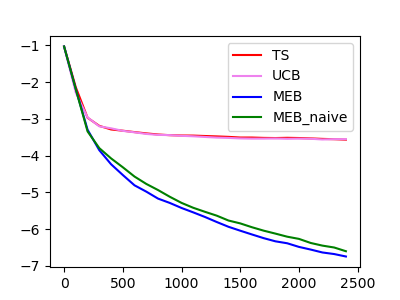
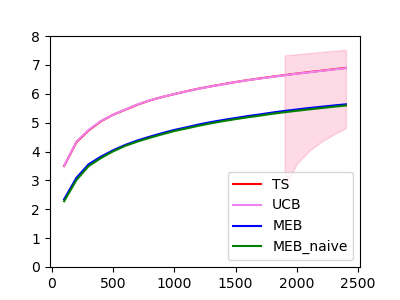

Namespace(T=5000, n=100, a=2, p=0.5, l=1.0, C=1.0, decay=False, decay_tmp=0.3333333333333333, decay_coef=1, decay_cut=0.5, sigma=0.1, sigma_e=1.0, dist_ops=0, save_name='gaussian_p2_se1.0_s_0.1', ind_S=100, save=True)


/Users/xuziping/Desktop/Research/Predicted-context/visualization.py:69: RuntimeWarning: divide by zero encountered in log
  ax.fill_between(np.arange(T)[sub], np.log(mean - sd)[sub], \


Algorithm TS: 0.309018, 0.292768
Algorithm UCB: 0.315703, 0.299035
Algorithm MEB: 0.084645, 0.111911
Algorithm MEB_naive: 0.087254, 0.115528


/Users/xuziping/Desktop/Research/Predicted-context/visualization.py:115: RuntimeWarning: divide by zero encountered in log
  ax.plot(np.arange(T)[sub], np.log(mean)[sub] , color = colors[alg], markersize=0.2, label = alg)
/Users/xuziping/Desktop/Research/Predicted-context/visualization.py:116: RuntimeWarning: divide by zero encountered in log
  ax.fill_between(np.arange(T)[sub], np.log(mean - sd)[sub], \
/Users/xuziping/Desktop/Research/Predicted-context/visualization.py:116: RuntimeWarning: invalid value encountered in log
  ax.fill_between(np.arange(T)[sub], np.log(mean - sd)[sub], \
/Users/xuziping/Desktop/Research/Predicted-context/visualization.py:117: RuntimeWarning: divide by zero encountered in log
  np.log(mean + sd)[sub], color = colors[alg], alpha=0.1)



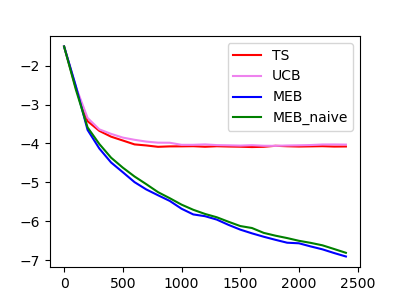
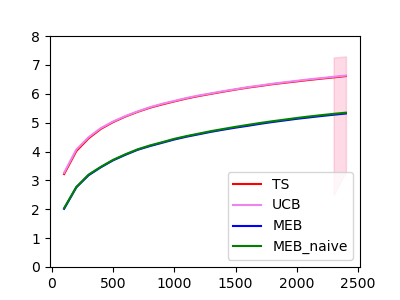

Namespace(T=5000, n=100, a=2, p=0.5, l=1.0, C=1.0, decay=False, decay_tmp=0.3333333333333333, decay_coef=1, decay_cut=0.5, sigma=5.0, sigma_e=1.0, dist_ops=0, save_name='gaussian_p2_se1.0_s_5.0', ind_S=100, save=True)


/Users/xuziping/Desktop/Research/Predicted-context/visualization.py:69: RuntimeWarning: divide by zero encountered in log
  ax.fill_between(np.arange(T)[sub], np.log(mean - sd)[sub], \


Algorithm TS: 1.321270, 0.417333
Algorithm UCB: 0.917768, 0.303525
Algorithm MEB: 1.458214, 0.421846
Algorithm MEB_naive: 1.321986, 0.387677


/Users/xuziping/Desktop/Research/Predicted-context/visualization.py:115: RuntimeWarning: divide by zero encountered in log
  ax.plot(np.arange(T)[sub], np.log(mean)[sub] , color = colors[alg], markersize=0.2, label = alg)
/Users/xuziping/Desktop/Research/Predicted-context/visualization.py:116: RuntimeWarning: divide by zero encountered in log
  ax.fill_between(np.arange(T)[sub], np.log(mean - sd)[sub], \
/Users/xuziping/Desktop/Research/Predicted-context/visualization.py:116: RuntimeWarning: invalid value encountered in log
  ax.fill_between(np.arange(T)[sub], np.log(mean - sd)[sub], \
/Users/xuziping/Desktop/Research/Predicted-context/visualization.py:117: RuntimeWarning: divide by zero encountered in log
  np.log(mean + sd)[sub], color = colors[alg], alpha=0.1)



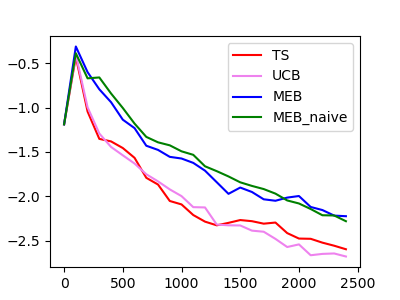
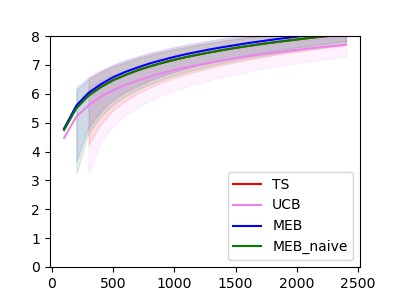

Namespace(T=5000, n=100, a=2, p=0.5, l=1.0, C=1.0, decay=False, decay_tmp=0.3333333333333333, decay_coef=1, decay_cut=0.5, sigma=0.05, sigma_e=2.0, dist_ops=0, save_name='gaussian_p2_se2.0_s_0.05', ind_S=100, save=True)
Algorithm TS: 0.660078, 0.343426


/Users/xuziping/Desktop/Research/Predicted-context/visualization.py:69: RuntimeWarning: divide by zero encountered in log
  ax.fill_between(np.arange(T)[sub], np.log(mean - sd)[sub], \
/Users/xuziping/Desktop/Research/Predicted-context/visualization.py:115: RuntimeWarning: divide by zero encountered in log
  ax.plot(np.arange(T)[sub], np.log(mean)[sub] , color = colors[alg], markersize=0.2, label = alg)
/Users/xuziping/Desktop/Research/Predicted-context/visualization.py:116: RuntimeWarning: divide by zero encountered in log
  ax.fill_between(np.arange(T)[sub], np.log(mean - sd)[sub], \
/Users/xuziping/Desktop/Research/Predicted-context/visualization.py:116: RuntimeWarning: invalid value encountered in log
  ax.fill_between(np.arange(T)[sub], np.log(mean - sd)[sub], \
/Users/xuziping/Desktop/Research/Predicted-context/visualization.py:117: RuntimeWarning: divide by zero encountered in log
  np.log(mean + sd)[sub], color = colors[alg], alpha=0.1)


Algorithm UCB: 0.633869, 0.321732
Algorithm MEB: 0.143739, 0.128847
Algorithm MEB_naive: 0.147533, 0.132724



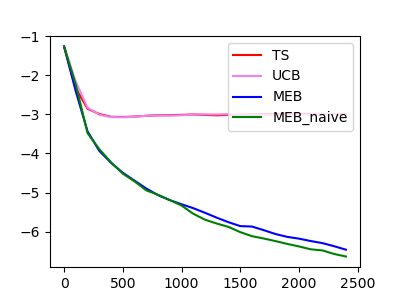
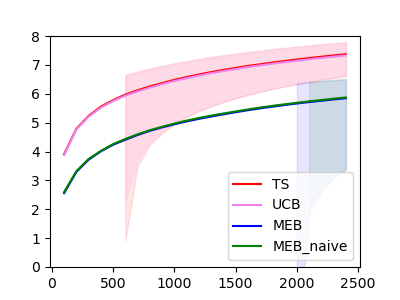

Namespace(T=5000, n=100, a=2, p=0.5, l=1.0, C=1.0, decay=False, decay_tmp=0.3333333333333333, decay_coef=1, decay_cut=0.5, sigma=0.1, sigma_e=2.0, dist_ops=0, save_name='gaussian_p2_se2.0_s_0.1', ind_S=100, save=True)


/Users/xuziping/Desktop/Research/Predicted-context/visualization.py:69: RuntimeWarning: divide by zero encountered in log
  ax.fill_between(np.arange(T)[sub], np.log(mean - sd)[sub], \


Algorithm TS: 0.740415, 0.505013
Algorithm UCB: 0.703794, 0.488595
Algorithm MEB: 0.151418, 0.145202
Algorithm MEB_naive: 0.155321, 0.149369


/Users/xuziping/Desktop/Research/Predicted-context/visualization.py:115: RuntimeWarning: divide by zero encountered in log
  ax.plot(np.arange(T)[sub], np.log(mean)[sub] , color = colors[alg], markersize=0.2, label = alg)
/Users/xuziping/Desktop/Research/Predicted-context/visualization.py:116: RuntimeWarning: divide by zero encountered in log
  ax.fill_between(np.arange(T)[sub], np.log(mean - sd)[sub], \
/Users/xuziping/Desktop/Research/Predicted-context/visualization.py:116: RuntimeWarning: invalid value encountered in log
  ax.fill_between(np.arange(T)[sub], np.log(mean - sd)[sub], \
/Users/xuziping/Desktop/Research/Predicted-context/visualization.py:117: RuntimeWarning: divide by zero encountered in log
  np.log(mean + sd)[sub], color = colors[alg], alpha=0.1)



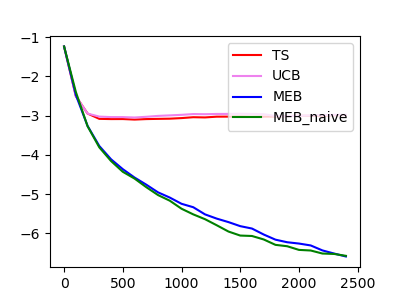
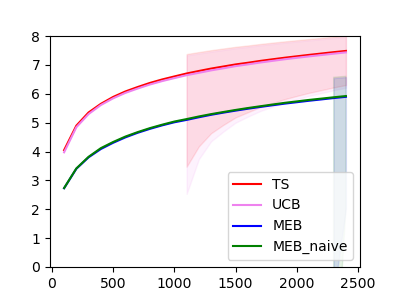

Namespace(T=5000, n=100, a=2, p=0.5, l=1.0, C=1.0, decay=False, decay_tmp=0.3333333333333333, decay_coef=1, decay_cut=0.5, sigma=5.0, sigma_e=2.0, dist_ops=0, save_name='gaussian_p2_se2.0_s_5.0', ind_S=100, save=True)


/Users/xuziping/Desktop/Research/Predicted-context/visualization.py:69: RuntimeWarning: divide by zero encountered in log
  ax.fill_between(np.arange(T)[sub], np.log(mean - sd)[sub], \


Algorithm TS: 1.585070, 0.454101
Algorithm UCB: 2.415448, 0.816198
Algorithm MEB: 1.577258, 0.507594
Algorithm MEB_naive: 1.436101, 0.462038


/Users/xuziping/Desktop/Research/Predicted-context/visualization.py:115: RuntimeWarning: divide by zero encountered in log
  ax.plot(np.arange(T)[sub], np.log(mean)[sub] , color = colors[alg], markersize=0.2, label = alg)
/Users/xuziping/Desktop/Research/Predicted-context/visualization.py:116: RuntimeWarning: divide by zero encountered in log
  ax.fill_between(np.arange(T)[sub], np.log(mean - sd)[sub], \
/Users/xuziping/Desktop/Research/Predicted-context/visualization.py:116: RuntimeWarning: invalid value encountered in log
  ax.fill_between(np.arange(T)[sub], np.log(mean - sd)[sub], \
/Users/xuziping/Desktop/Research/Predicted-context/visualization.py:117: RuntimeWarning: divide by zero encountered in log
  np.log(mean + sd)[sub], color = colors[alg], alpha=0.1)



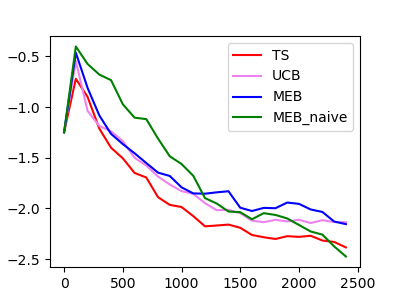
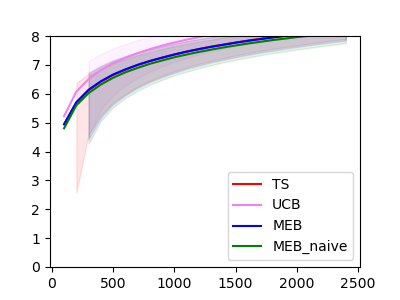

0.05 , 0.1 , 0.027 (0.067),0.027 (0.070),0.022 (0.057),0.024 (0.058)
0.1 , 0.1 , 0.026 (0.057),0.024 (0.053),0.020 (0.046),0.020 (0.046)
5.0 , 0.1 , 1.030 (0.287),0.743 (0.262),0.831 (0.267),1.173 (0.343)
0.05 , 1.0 , 0.412 (0.355),0.408 (0.351),0.117 (0.148),0.112 (0.143)
0.1 , 1.0 , 0.309 (0.293),0.316 (0.299),0.085 (0.112),0.087 (0.116)
5.0 , 1.0 , 1.321 (0.417),0.918 (0.304),1.458 (0.422),1.322 (0.388)
0.05 , 2.0 , 0.660 (0.343),0.634 (0.322),0.144 (0.129),0.148 (0.133)
0.1 , 2.0 , 0.740 (0.505),0.704 (0.489),0.151 (0.145),0.155 (0.149)
5.0 , 2.0 , 1.585 (0.454),2.415 (0.816),1.577 (0.508),1.436 (0.462)


In [9]:
# scale = 0.1
se_list = [0.1, 1.0, 2.0]
s_list = [0.05, 0.1, 5.0]
res_m = []
res_s = []
import subprocess

for se in se_list:
    for s in s_list:
        save_name = 'gaussian_p2_se%s_s_%s'%(str(se), str(s))
#         subprocess.call(["python", "RunExp_real.py", '-T', '5000', '-n', '100',
#                     '--save_name', save_name, '--sigma_e', str(se), '--ind_S', '100', '--decay_cut', '0.5', 
#                      '-p', '0.5', '--save', '--sigma', str(s)
#                     ])

        with open('Pickle_files_real/%s.pickle'%(save_name), 'rb') as f:
            results, algs, attr, args = pickle.load(f)
        oPlot = FlowLayout()
        print(args)
        save = True
        plot_error(results, algs, oPlot, 1, save = save, savename = save_name,sub_sampling = 100, warmup = 0.5)
        m, s = plot_regret(results, algs, oPlot, save = save, log = True, upper = 8, savename = save_name, warmup = 0.5,sub_sampling = 100)
        oPlot.PassHtmlToCell()
        res_m.append(m)
        res_s.append(s)
i = 0
for se in se_list:
    for s in s_list:
        res = ','.join(map(lambda j: '%.3f' % (res_m[i][j]) + ' (%.3f)' % (res_s[i][j]), range(4)))
        print(s, ',', se, ',', res)
        i += 1

gaussian_p2_se0.1_s_0.01
Namespace(T=50000, d=5, n=10, a=2, p=0.2, l=1.0, offset=5.0, decay=False, decay_tmp=0.3333333333333333, decay_coef=1, decay_cut=0.0, sigma=0.01, sigma_e=0.1, scale=1.0, dist_ops=0, save_name='gaussian_p2_se0.1_s_0.01', theta0=[1, 0, 0, 0, 0], theta1=[0, 1, -1, 1, -1], ind_S=500, save=True)


UnboundLocalError: cannot access local variable 'sd' where it is not associated with a value

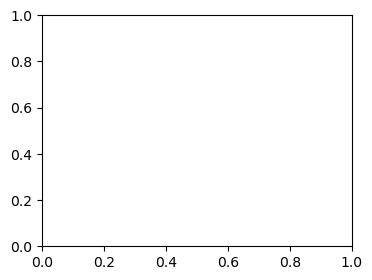

In [2]:
import subprocess

se_list = [0.1, 0.5, 1.0, 2.0]
s_list = [0.01, 0.1, 1.0]

for se in se_list:
    for s in s_list:

        save_name = 'gaussian_p2_se%s_s_%s'%(str(se), str(s))
        print(save_name)
#         subprocess.call(["python", "RunExp.py", '-T', '50000', '-n', '10',
#                          '--scale', '1', '--dist_ops', '0', '-d', '5', '--offset', '5',
#                         '--save_name', save_name, '--sigma', str(s),# '--decay_cut', '0.5',
#                          '--sigma_e', str(se), '--ind_S', '500', '-p', '0.2', '--save'])
        with open('Pickle_files/%s.pickle'%(save_name), 'rb') as f:
            results, algs, attr, args = pickle.load(f)
        oPlot = FlowLayout()
        print(args)
        save = True
        plot_error(results, algs, oPlot, 1, save = save, savename = save_name)
        plot_regret(results, algs, oPlot, log = True, upper = 9, save = save, savename = save_name)
        oPlot.PassHtmlToCell()

gaussian_p2_se2.0_s_0.01
0 1 2 3 4 5 6 7 8 9 10 11 12 13 14 15 16 17 18 19 20 21 22 23 24 25 26 27 28 29 Namespace(T=10000, d=5, n=30, a=2, p=0.2, l=1.0, offset=10.0, decay=False, decay_tmp=0.3333333333333333, decay_coef=1, decay_cut=0.0, sigma=0.01, sigma_e=2.0, scale=1.0, dist_ops=0, save_name='gaussian_p2_se2.0_s_0.01', theta0=[1, 0, 0, 0, 0], theta1=[0, 1, -1, 1, -1], ind_S=500, save=True)
Algorithm TS: 0.841167


/Users/zipingxu/Desktop/Predicted-context/visualization.py:108: RuntimeWarning: divide by zero encountered in log
  ax.plot(np.arange(T)[sub], np.log(mean)[sub] , color = colors[alg], markersize=0.2, label = alg)
/Users/zipingxu/Desktop/Predicted-context/visualization.py:109: RuntimeWarning: divide by zero encountered in log
  ax.fill_between(np.arange(T)[sub], np.log(mean - sd)[sub], \
/Users/zipingxu/Desktop/Predicted-context/visualization.py:109: RuntimeWarning: invalid value encountered in log
  ax.fill_between(np.arange(T)[sub], np.log(mean - sd)[sub], \
/Users/zipingxu/Desktop/Predicted-context/visualization.py:110: RuntimeWarning: divide by zero encountered in log
  np.log(mean + sd)[sub], color = colors[alg], alpha=0.1)


Algorithm UCB: 0.633432


/Users/zipingxu/Desktop/Predicted-context/visualization.py:102: RuntimeWarning: invalid value encountered in sqrt
  sd = ((sum2 - mean ** 2) ** 0.5 / (n_experiment))
/Users/zipingxu/Desktop/Predicted-context/visualization.py:108: RuntimeWarning: invalid value encountered in log
  ax.plot(np.arange(T)[sub], np.log(mean)[sub] , color = colors[alg], markersize=0.2, label = alg)


Algorithm MEB: 0.542998
Algorithm MEB_naive: 0.510525



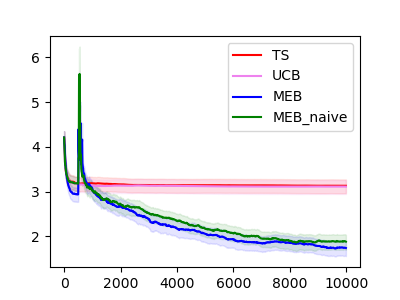
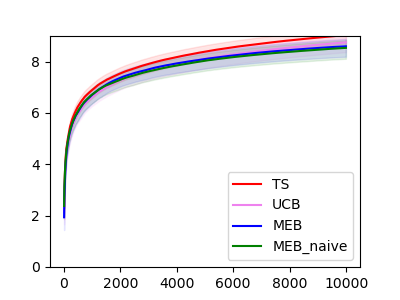

gaussian_p2_se2.0_s_0.1
0 1 2 3 4 5 6 7 8 9 10 11 12 13 14 15 16 17 18 19 20 21 22 23 24 25 26 27 28 29 Namespace(T=10000, d=5, n=30, a=2, p=0.2, l=1.0, offset=10.0, decay=False, decay_tmp=0.3333333333333333, decay_coef=1, decay_cut=0.0, sigma=0.1, sigma_e=2.0, scale=1.0, dist_ops=0, save_name='gaussian_p2_se2.0_s_0.1', theta0=[1, 0, 0, 0, 0], theta1=[0, 1, -1, 1, -1], ind_S=500, save=True)
Algorithm TS: 0.784918
Algorithm UCB: 0.751515
Algorithm MEB: 0.516701
Algorithm MEB_naive: 0.469557


/Users/zipingxu/Desktop/Predicted-context/visualization.py:108: RuntimeWarning: divide by zero encountered in log
  ax.plot(np.arange(T)[sub], np.log(mean)[sub] , color = colors[alg], markersize=0.2, label = alg)
/Users/zipingxu/Desktop/Predicted-context/visualization.py:109: RuntimeWarning: divide by zero encountered in log
  ax.fill_between(np.arange(T)[sub], np.log(mean - sd)[sub], \
/Users/zipingxu/Desktop/Predicted-context/visualization.py:110: RuntimeWarning: divide by zero encountered in log
  np.log(mean + sd)[sub], color = colors[alg], alpha=0.1)
/Users/zipingxu/Desktop/Predicted-context/visualization.py:109: RuntimeWarning: invalid value encountered in log
  ax.fill_between(np.arange(T)[sub], np.log(mean - sd)[sub], \



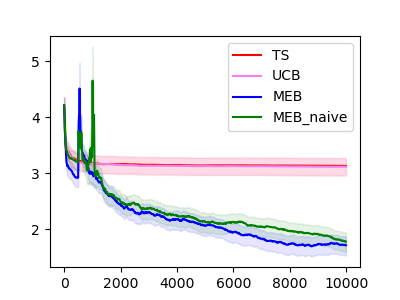
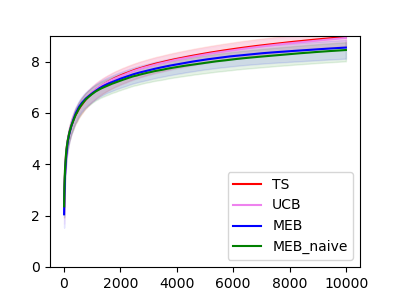

gaussian_p2_se2.0_s_1.0
0 1 2 3 4 5 6 7 8 9 10 11 12 13 14 15 16 17 18 19 20 21 22 23 24 25 26 27 28 29 Namespace(T=10000, d=5, n=30, a=2, p=0.2, l=1.0, offset=10.0, decay=False, decay_tmp=0.3333333333333333, decay_coef=1, decay_cut=0.0, sigma=1.0, sigma_e=2.0, scale=1.0, dist_ops=0, save_name='gaussian_p2_se2.0_s_1.0', theta0=[1, 0, 0, 0, 0], theta1=[0, 1, -1, 1, -1], ind_S=500, save=True)
Algorithm TS: 0.701959
Algorithm UCB: 0.907647
Algorithm MEB: 0.572678
Algorithm MEB_naive: 0.591482


/Users/zipingxu/Desktop/Predicted-context/visualization.py:108: RuntimeWarning: divide by zero encountered in log
  ax.plot(np.arange(T)[sub], np.log(mean)[sub] , color = colors[alg], markersize=0.2, label = alg)
/Users/zipingxu/Desktop/Predicted-context/visualization.py:109: RuntimeWarning: divide by zero encountered in log
  ax.fill_between(np.arange(T)[sub], np.log(mean - sd)[sub], \
/Users/zipingxu/Desktop/Predicted-context/visualization.py:110: RuntimeWarning: divide by zero encountered in log
  np.log(mean + sd)[sub], color = colors[alg], alpha=0.1)



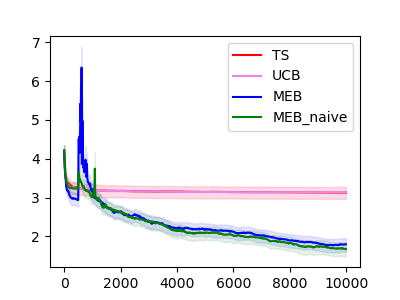
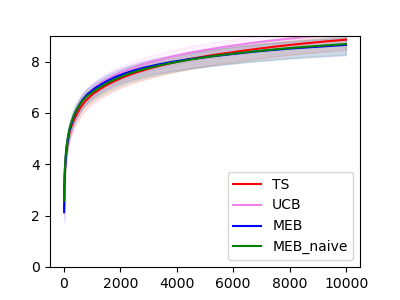

In [39]:
import subprocess

se_list = [2.0]
s_list = [0.01, 0.1, 1.0]

for se in se_list:
    for s in s_list:

        save_name = 'gaussian_p2_se%s_s_%s'%(str(se), str(s))
        print(save_name)
        subprocess.call(["python", "RunExp.py", '-T', '10000', '-n', '30',
                         '--scale', '1', '--dist_ops', '0', '-d', '5', '--offset', '10',
                        '--save_name', save_name, '--sigma', str(s),# '--decay_cut', '0.5',
                         '--sigma_e', str(se), '--ind_S', '500', '-p', '0.2', '--save'])
        with open('Pickle_files/%s.pickle'%(save_name), 'rb') as f:
            results, algs, attr, args = pickle.load(f)
        oPlot = FlowLayout()
        print(args)
        save = True
        plot_error(results, algs, oPlot, 1, save = save, savename = save_name)
        plot_regret(results, algs, oPlot, log = True, upper = 9, save = save, savename = save_name)
        oPlot.PassHtmlToCell()

gaussian_p2_se0.1_s_0.01_warm05
0 1 2 3 4 5 6 7 8 9 10 11 12 13 14 15 16 17 18 19 20 21 22 23 24 25 26 27 28 29 Namespace(T=10000, d=5, n=30, a=2, p=0.5, l=1.0, offset=10.0, decay=False, decay_tmp=0.3333333333333333, decay_coef=1, decay_cut=0.5, sigma=0.01, sigma_e=0.1, scale=1.0, dist_ops=0, save_name='gaussian_p2_se0.1_s_0.01_warm05', theta0=[1, 0, 0, 0, 0], theta1=[0, 1, -1, 1, -1], ind_S=500, save=True)
Algorithm TS: 0.037788
Algorithm UCB: 0.042005
Algorithm MEB: 0.033577
Algorithm MEB_naive: 0.036023


/Users/zipingxu/Desktop/Predicted-context/visualization.py:102: RuntimeWarning: invalid value encountered in sqrt
  sd = ((sum2 - mean ** 2) ** 0.5 / (n_experiment))
/Users/zipingxu/Desktop/Predicted-context/visualization.py:108: RuntimeWarning: divide by zero encountered in log
  ax.plot(np.arange(T)[sub], np.log(mean)[sub] , color = colors[alg], markersize=0.2, label = alg)
/Users/zipingxu/Desktop/Predicted-context/visualization.py:108: RuntimeWarning: invalid value encountered in log
  ax.plot(np.arange(T)[sub], np.log(mean)[sub] , color = colors[alg], markersize=0.2, label = alg)
/Users/zipingxu/Desktop/Predicted-context/visualization.py:109: RuntimeWarning: divide by zero encountered in log
  ax.fill_between(np.arange(T)[sub], np.log(mean - sd)[sub], \
/Users/zipingxu/Desktop/Predicted-context/visualization.py:109: RuntimeWarning: invalid value encountered in log
  ax.fill_between(np.arange(T)[sub], np.log(mean - sd)[sub], \
/Users/zipingxu/Desktop/Predicted-context/visualization.


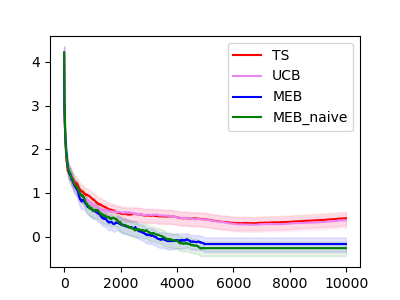
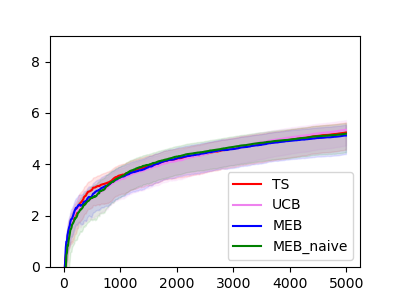

gaussian_p2_se0.1_s_0.1_warm05
0 1 2 3 4 5 6 7 8 9 10 11 12 13 14 15 16 17 18 19 20 21 22 23 24 25 26 27 28 29 Namespace(T=10000, d=5, n=30, a=2, p=0.5, l=1.0, offset=10.0, decay=False, decay_tmp=0.3333333333333333, decay_coef=1, decay_cut=0.5, sigma=0.1, sigma_e=0.1, scale=1.0, dist_ops=0, save_name='gaussian_p2_se0.1_s_0.1_warm05', theta0=[1, 0, 0, 0, 0], theta1=[0, 1, -1, 1, -1], ind_S=500, save=True)
Algorithm TS: 0.046847
Algorithm UCB: 0.055405
Algorithm MEB: 0.045913
Algorithm MEB_naive: 0.042850


/Users/zipingxu/Desktop/Predicted-context/visualization.py:102: RuntimeWarning: invalid value encountered in sqrt
  sd = ((sum2 - mean ** 2) ** 0.5 / (n_experiment))
/Users/zipingxu/Desktop/Predicted-context/visualization.py:108: RuntimeWarning: divide by zero encountered in log
  ax.plot(np.arange(T)[sub], np.log(mean)[sub] , color = colors[alg], markersize=0.2, label = alg)
/Users/zipingxu/Desktop/Predicted-context/visualization.py:108: RuntimeWarning: invalid value encountered in log
  ax.plot(np.arange(T)[sub], np.log(mean)[sub] , color = colors[alg], markersize=0.2, label = alg)
/Users/zipingxu/Desktop/Predicted-context/visualization.py:109: RuntimeWarning: divide by zero encountered in log
  ax.fill_between(np.arange(T)[sub], np.log(mean - sd)[sub], \
/Users/zipingxu/Desktop/Predicted-context/visualization.py:109: RuntimeWarning: invalid value encountered in log
  ax.fill_between(np.arange(T)[sub], np.log(mean - sd)[sub], \
/Users/zipingxu/Desktop/Predicted-context/visualization.


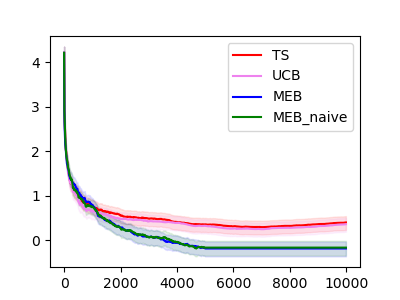
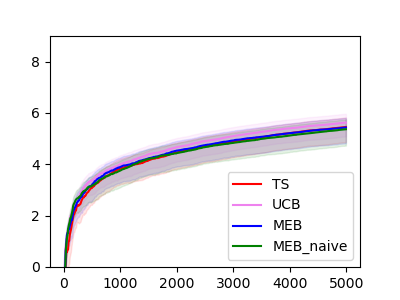

gaussian_p2_se0.1_s_1.0_warm05
0 1 2 3 4 5 6 7 8 9 10 11 12 13 14 15 16 17 18 19 20 21 22 23 24 25 26 27 28 29 Namespace(T=10000, d=5, n=30, a=2, p=0.5, l=1.0, offset=10.0, decay=False, decay_tmp=0.3333333333333333, decay_coef=1, decay_cut=0.5, sigma=1.0, sigma_e=0.1, scale=1.0, dist_ops=0, save_name='gaussian_p2_se0.1_s_1.0_warm05', theta0=[1, 0, 0, 0, 0], theta1=[0, 1, -1, 1, -1], ind_S=500, save=True)
Algorithm TS: 0.047183
Algorithm UCB: 0.051278
Algorithm MEB: 0.044860
Algorithm MEB_naive: 0.055953


/Users/zipingxu/Desktop/Predicted-context/visualization.py:108: RuntimeWarning: divide by zero encountered in log
  ax.plot(np.arange(T)[sub], np.log(mean)[sub] , color = colors[alg], markersize=0.2, label = alg)
/Users/zipingxu/Desktop/Predicted-context/visualization.py:109: RuntimeWarning: divide by zero encountered in log
  ax.fill_between(np.arange(T)[sub], np.log(mean - sd)[sub], \
/Users/zipingxu/Desktop/Predicted-context/visualization.py:109: RuntimeWarning: invalid value encountered in log
  ax.fill_between(np.arange(T)[sub], np.log(mean - sd)[sub], \
/Users/zipingxu/Desktop/Predicted-context/visualization.py:110: RuntimeWarning: divide by zero encountered in log
  np.log(mean + sd)[sub], color = colors[alg], alpha=0.1)
/Users/zipingxu/Desktop/Predicted-context/visualization.py:102: RuntimeWarning: invalid value encountered in sqrt
  sd = ((sum2 - mean ** 2) ** 0.5 / (n_experiment))
/Users/zipingxu/Desktop/Predicted-context/visualization.py:108: RuntimeWarning: invalid value en


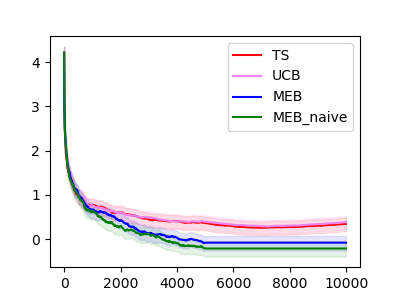
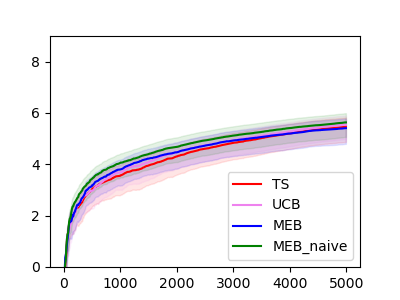

gaussian_p2_se0.5_s_0.01_warm05
0 1 2 3 4 5 6 7 8 9 10 11 12 13 14 15 16 17 18 19 20 21 22 23 24 25 26 27 28 29 Namespace(T=10000, d=5, n=30, a=2, p=0.5, l=1.0, offset=10.0, decay=False, decay_tmp=0.3333333333333333, decay_coef=1, decay_cut=0.5, sigma=0.01, sigma_e=0.5, scale=1.0, dist_ops=0, save_name='gaussian_p2_se0.5_s_0.01_warm05', theta0=[1, 0, 0, 0, 0], theta1=[0, 1, -1, 1, -1], ind_S=500, save=True)
Algorithm TS: 0.244276
Algorithm UCB: 0.299401
Algorithm MEB: 0.221737
Algorithm MEB_naive: 0.248974


/Users/zipingxu/Desktop/Predicted-context/visualization.py:108: RuntimeWarning: divide by zero encountered in log
  ax.plot(np.arange(T)[sub], np.log(mean)[sub] , color = colors[alg], markersize=0.2, label = alg)
/Users/zipingxu/Desktop/Predicted-context/visualization.py:109: RuntimeWarning: divide by zero encountered in log
  ax.fill_between(np.arange(T)[sub], np.log(mean - sd)[sub], \
/Users/zipingxu/Desktop/Predicted-context/visualization.py:110: RuntimeWarning: divide by zero encountered in log
  np.log(mean + sd)[sub], color = colors[alg], alpha=0.1)
/Users/zipingxu/Desktop/Predicted-context/visualization.py:102: RuntimeWarning: invalid value encountered in sqrt
  sd = ((sum2 - mean ** 2) ** 0.5 / (n_experiment))



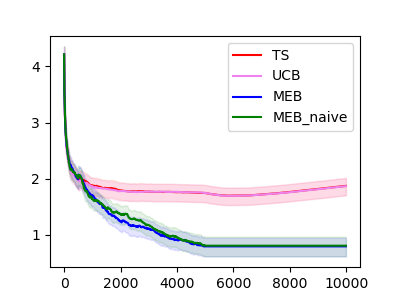
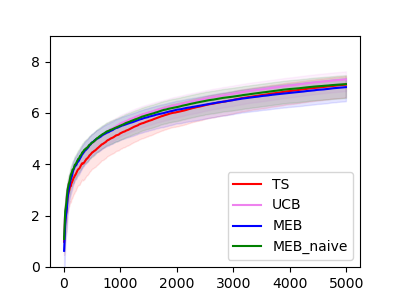

gaussian_p2_se0.5_s_0.1_warm05
0 1 2 3 4 5 6 7 8 9 10 11 12 13 14 15 16 17 18 19 20 21 22 23 24 25 26 27 28 29 Namespace(T=10000, d=5, n=30, a=2, p=0.5, l=1.0, offset=10.0, decay=False, decay_tmp=0.3333333333333333, decay_coef=1, decay_cut=0.5, sigma=0.1, sigma_e=0.5, scale=1.0, dist_ops=0, save_name='gaussian_p2_se0.5_s_0.1_warm05', theta0=[1, 0, 0, 0, 0], theta1=[0, 1, -1, 1, -1], ind_S=500, save=True)
Algorithm TS: 0.246930
Algorithm UCB: 0.256566
Algorithm MEB: 0.201972
Algorithm MEB_naive: 0.221611


/Users/zipingxu/Desktop/Predicted-context/visualization.py:108: RuntimeWarning: divide by zero encountered in log
  ax.plot(np.arange(T)[sub], np.log(mean)[sub] , color = colors[alg], markersize=0.2, label = alg)
/Users/zipingxu/Desktop/Predicted-context/visualization.py:109: RuntimeWarning: divide by zero encountered in log
  ax.fill_between(np.arange(T)[sub], np.log(mean - sd)[sub], \
/Users/zipingxu/Desktop/Predicted-context/visualization.py:109: RuntimeWarning: invalid value encountered in log
  ax.fill_between(np.arange(T)[sub], np.log(mean - sd)[sub], \
/Users/zipingxu/Desktop/Predicted-context/visualization.py:110: RuntimeWarning: divide by zero encountered in log
  np.log(mean + sd)[sub], color = colors[alg], alpha=0.1)
/Users/zipingxu/Desktop/Predicted-context/visualization.py:102: RuntimeWarning: invalid value encountered in sqrt
  sd = ((sum2 - mean ** 2) ** 0.5 / (n_experiment))
/Users/zipingxu/Desktop/Predicted-context/visualization.py:108: RuntimeWarning: invalid value en


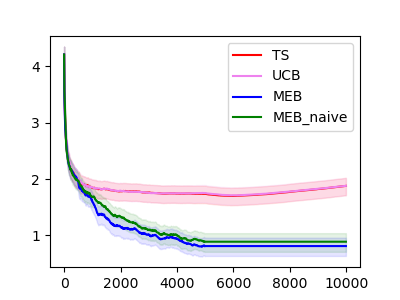
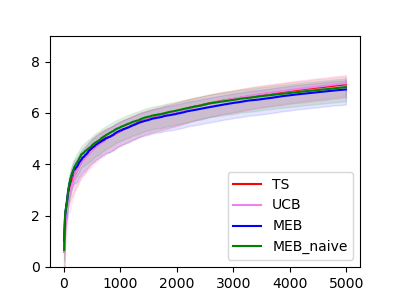

gaussian_p2_se0.5_s_1.0_warm05
0 1 2 3 4 5 6 7 8 9 10 11 12 13 14 15 16 17 18 19 20 21 22 23 24 25 26 27 28 29 Namespace(T=10000, d=5, n=30, a=2, p=0.5, l=1.0, offset=10.0, decay=False, decay_tmp=0.3333333333333333, decay_coef=1, decay_cut=0.5, sigma=1.0, sigma_e=0.5, scale=1.0, dist_ops=0, save_name='gaussian_p2_se0.5_s_1.0_warm05', theta0=[1, 0, 0, 0, 0], theta1=[0, 1, -1, 1, -1], ind_S=500, save=True)
Algorithm TS: 0.246941
Algorithm UCB: 0.224951
Algorithm MEB: 0.210940
Algorithm MEB_naive: 0.248893


/Users/zipingxu/Desktop/Predicted-context/visualization.py:108: RuntimeWarning: divide by zero encountered in log
  ax.plot(np.arange(T)[sub], np.log(mean)[sub] , color = colors[alg], markersize=0.2, label = alg)
/Users/zipingxu/Desktop/Predicted-context/visualization.py:109: RuntimeWarning: divide by zero encountered in log
  ax.fill_between(np.arange(T)[sub], np.log(mean - sd)[sub], \
/Users/zipingxu/Desktop/Predicted-context/visualization.py:109: RuntimeWarning: invalid value encountered in log
  ax.fill_between(np.arange(T)[sub], np.log(mean - sd)[sub], \
/Users/zipingxu/Desktop/Predicted-context/visualization.py:110: RuntimeWarning: divide by zero encountered in log
  np.log(mean + sd)[sub], color = colors[alg], alpha=0.1)
/Users/zipingxu/Desktop/Predicted-context/visualization.py:102: RuntimeWarning: invalid value encountered in sqrt
  sd = ((sum2 - mean ** 2) ** 0.5 / (n_experiment))
/Users/zipingxu/Desktop/Predicted-context/visualization.py:108: RuntimeWarning: invalid value en


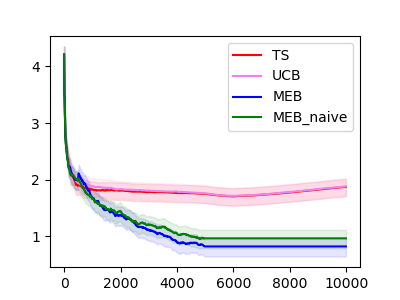
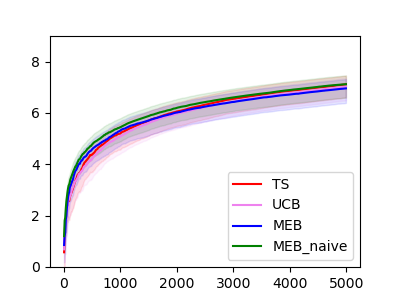

gaussian_p2_se1.0_s_0.01_warm05
0 1 2 3 4 5 6 7 8 9 10 11 12 13 14 15 16 17 18 19 20 21 22 23 24 25 26 27 28 29 Namespace(T=10000, d=5, n=30, a=2, p=0.5, l=1.0, offset=10.0, decay=False, decay_tmp=0.3333333333333333, decay_coef=1, decay_cut=0.5, sigma=0.01, sigma_e=1.0, scale=1.0, dist_ops=0, save_name='gaussian_p2_se1.0_s_0.01_warm05', theta0=[1, 0, 0, 0, 0], theta1=[0, 1, -1, 1, -1], ind_S=500, save=True)
Algorithm TS: 0.494688
Algorithm UCB: 0.369928
Algorithm MEB: 0.387456
Algorithm MEB_naive: 0.407885


/Users/zipingxu/Desktop/Predicted-context/visualization.py:108: RuntimeWarning: divide by zero encountered in log
  ax.plot(np.arange(T)[sub], np.log(mean)[sub] , color = colors[alg], markersize=0.2, label = alg)
/Users/zipingxu/Desktop/Predicted-context/visualization.py:109: RuntimeWarning: divide by zero encountered in log
  ax.fill_between(np.arange(T)[sub], np.log(mean - sd)[sub], \
/Users/zipingxu/Desktop/Predicted-context/visualization.py:110: RuntimeWarning: divide by zero encountered in log
  np.log(mean + sd)[sub], color = colors[alg], alpha=0.1)
/Users/zipingxu/Desktop/Predicted-context/visualization.py:108: RuntimeWarning: invalid value encountered in log
  ax.plot(np.arange(T)[sub], np.log(mean)[sub] , color = colors[alg], markersize=0.2, label = alg)
/Users/zipingxu/Desktop/Predicted-context/visualization.py:109: RuntimeWarning: invalid value encountered in log
  ax.fill_between(np.arange(T)[sub], np.log(mean - sd)[sub], \



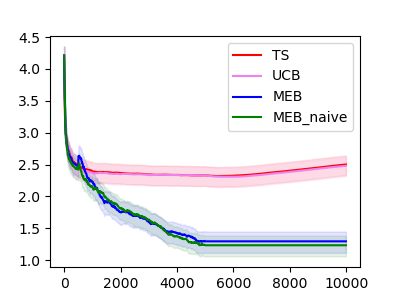
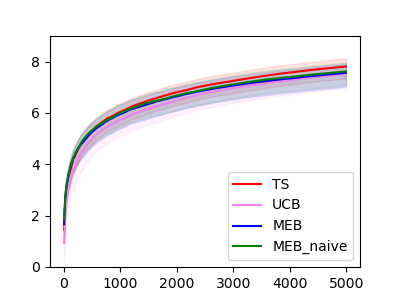

gaussian_p2_se1.0_s_0.1_warm05
0 1 2 3 4 5 6 7 8 9 10 11 12 13 14 15 16 17 18 19 20 21 22 23 24 25 26 27 28 29 Namespace(T=10000, d=5, n=30, a=2, p=0.5, l=1.0, offset=10.0, decay=False, decay_tmp=0.3333333333333333, decay_coef=1, decay_cut=0.5, sigma=0.1, sigma_e=1.0, scale=1.0, dist_ops=0, save_name='gaussian_p2_se1.0_s_0.1_warm05', theta0=[1, 0, 0, 0, 0], theta1=[0, 1, -1, 1, -1], ind_S=500, save=True)
Algorithm TS: 0.455111
Algorithm UCB: 0.384153
Algorithm MEB: 0.434574
Algorithm MEB_naive: 0.460213


/Users/zipingxu/Desktop/Predicted-context/visualization.py:108: RuntimeWarning: divide by zero encountered in log
  ax.plot(np.arange(T)[sub], np.log(mean)[sub] , color = colors[alg], markersize=0.2, label = alg)
/Users/zipingxu/Desktop/Predicted-context/visualization.py:109: RuntimeWarning: divide by zero encountered in log
  ax.fill_between(np.arange(T)[sub], np.log(mean - sd)[sub], \
/Users/zipingxu/Desktop/Predicted-context/visualization.py:109: RuntimeWarning: invalid value encountered in log
  ax.fill_between(np.arange(T)[sub], np.log(mean - sd)[sub], \
/Users/zipingxu/Desktop/Predicted-context/visualization.py:110: RuntimeWarning: divide by zero encountered in log
  np.log(mean + sd)[sub], color = colors[alg], alpha=0.1)
/Users/zipingxu/Desktop/Predicted-context/visualization.py:102: RuntimeWarning: invalid value encountered in sqrt
  sd = ((sum2 - mean ** 2) ** 0.5 / (n_experiment))
/Users/zipingxu/Desktop/Predicted-context/visualization.py:108: RuntimeWarning: invalid value en


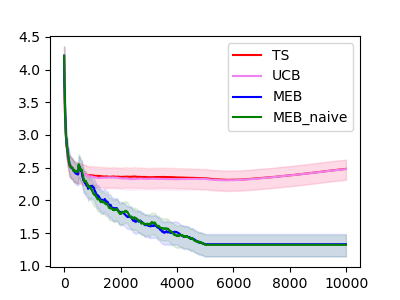
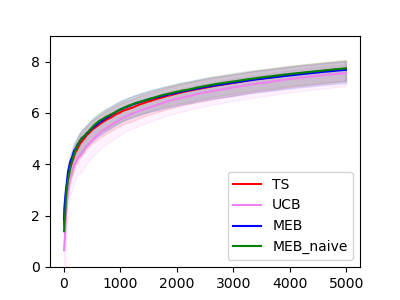

gaussian_p2_se1.0_s_1.0_warm05
0 1 2 3 4 5 6 7 8 9 10 11 12 13 14 15 16 17 18 19 20 21 22 23 24 25 26 27 28 29 Namespace(T=10000, d=5, n=30, a=2, p=0.5, l=1.0, offset=10.0, decay=False, decay_tmp=0.3333333333333333, decay_coef=1, decay_cut=0.5, sigma=1.0, sigma_e=1.0, scale=1.0, dist_ops=0, save_name='gaussian_p2_se1.0_s_1.0_warm05', theta0=[1, 0, 0, 0, 0], theta1=[0, 1, -1, 1, -1], ind_S=500, save=True)
Algorithm TS: 0.324016
Algorithm UCB: 0.424095
Algorithm MEB: 0.394927
Algorithm MEB_naive: 0.383277


/Users/zipingxu/Desktop/Predicted-context/visualization.py:102: RuntimeWarning: invalid value encountered in sqrt
  sd = ((sum2 - mean ** 2) ** 0.5 / (n_experiment))
/Users/zipingxu/Desktop/Predicted-context/visualization.py:108: RuntimeWarning: divide by zero encountered in log
  ax.plot(np.arange(T)[sub], np.log(mean)[sub] , color = colors[alg], markersize=0.2, label = alg)
/Users/zipingxu/Desktop/Predicted-context/visualization.py:108: RuntimeWarning: invalid value encountered in log
  ax.plot(np.arange(T)[sub], np.log(mean)[sub] , color = colors[alg], markersize=0.2, label = alg)
/Users/zipingxu/Desktop/Predicted-context/visualization.py:109: RuntimeWarning: divide by zero encountered in log
  ax.fill_between(np.arange(T)[sub], np.log(mean - sd)[sub], \
/Users/zipingxu/Desktop/Predicted-context/visualization.py:109: RuntimeWarning: invalid value encountered in log
  ax.fill_between(np.arange(T)[sub], np.log(mean - sd)[sub], \
/Users/zipingxu/Desktop/Predicted-context/visualization.


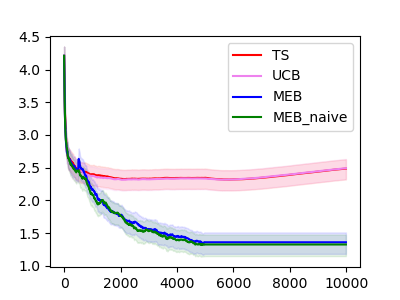
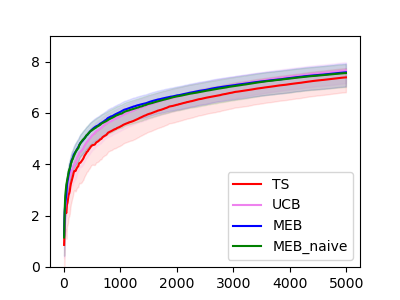

gaussian_p2_se2.0_s_0.01_warm05
0 1 2 3 4 5 6 7 8 9 10 11 12 13 14 15 16 17 18 19 20 21 22 23 24 25 26 27 28 29 Namespace(T=10000, d=5, n=30, a=2, p=0.5, l=1.0, offset=10.0, decay=False, decay_tmp=0.3333333333333333, decay_coef=1, decay_cut=0.5, sigma=0.01, sigma_e=2.0, scale=1.0, dist_ops=0, save_name='gaussian_p2_se2.0_s_0.01_warm05', theta0=[1, 0, 0, 0, 0], theta1=[0, 1, -1, 1, -1], ind_S=500, save=True)
Algorithm TS: 0.685196
Algorithm UCB: 0.895847
Algorithm MEB: 0.750522
Algorithm MEB_naive: 0.614619


/Users/zipingxu/Desktop/Predicted-context/visualization.py:108: RuntimeWarning: divide by zero encountered in log
  ax.plot(np.arange(T)[sub], np.log(mean)[sub] , color = colors[alg], markersize=0.2, label = alg)
/Users/zipingxu/Desktop/Predicted-context/visualization.py:109: RuntimeWarning: divide by zero encountered in log
  ax.fill_between(np.arange(T)[sub], np.log(mean - sd)[sub], \
/Users/zipingxu/Desktop/Predicted-context/visualization.py:109: RuntimeWarning: invalid value encountered in log
  ax.fill_between(np.arange(T)[sub], np.log(mean - sd)[sub], \
/Users/zipingxu/Desktop/Predicted-context/visualization.py:110: RuntimeWarning: divide by zero encountered in log
  np.log(mean + sd)[sub], color = colors[alg], alpha=0.1)
/Users/zipingxu/Desktop/Predicted-context/visualization.py:102: RuntimeWarning: invalid value encountered in sqrt
  sd = ((sum2 - mean ** 2) ** 0.5 / (n_experiment))
/Users/zipingxu/Desktop/Predicted-context/visualization.py:108: RuntimeWarning: invalid value en


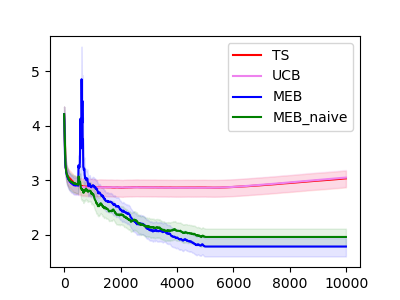
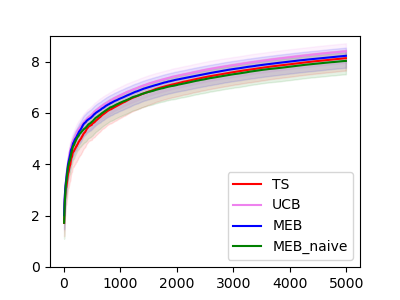

gaussian_p2_se2.0_s_0.1_warm05
0 1 2 3 4 5 6 7 8 9 10 11 12 13 14 15 16 17 18 19 20 21 22 23 24 25 26 27 28 29 Namespace(T=10000, d=5, n=30, a=2, p=0.5, l=1.0, offset=10.0, decay=False, decay_tmp=0.3333333333333333, decay_coef=1, decay_cut=0.5, sigma=0.1, sigma_e=2.0, scale=1.0, dist_ops=0, save_name='gaussian_p2_se2.0_s_0.1_warm05', theta0=[1, 0, 0, 0, 0], theta1=[0, 1, -1, 1, -1], ind_S=500, save=True)
Algorithm TS: 0.581188
Algorithm UCB: 0.727428
Algorithm MEB: 0.813900
Algorithm MEB_naive: 0.793896


/Users/zipingxu/Desktop/Predicted-context/visualization.py:108: RuntimeWarning: divide by zero encountered in log
  ax.plot(np.arange(T)[sub], np.log(mean)[sub] , color = colors[alg], markersize=0.2, label = alg)
/Users/zipingxu/Desktop/Predicted-context/visualization.py:109: RuntimeWarning: divide by zero encountered in log
  ax.fill_between(np.arange(T)[sub], np.log(mean - sd)[sub], \
/Users/zipingxu/Desktop/Predicted-context/visualization.py:110: RuntimeWarning: divide by zero encountered in log
  np.log(mean + sd)[sub], color = colors[alg], alpha=0.1)



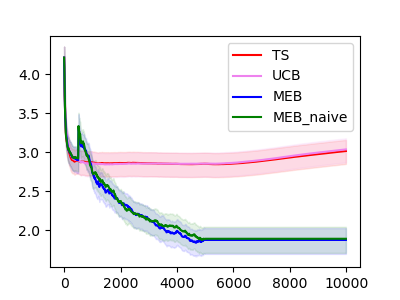
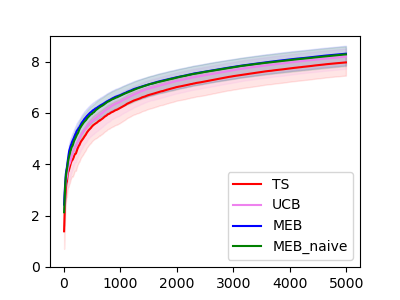

gaussian_p2_se2.0_s_1.0_warm05
0 1 2 3 4 5 6 7 8 9 10 11 12 13 14 15 16 17 18 19 20 21 22 23 24 25 26 27 28 29 Namespace(T=10000, d=5, n=30, a=2, p=0.5, l=1.0, offset=10.0, decay=False, decay_tmp=0.3333333333333333, decay_coef=1, decay_cut=0.5, sigma=1.0, sigma_e=2.0, scale=1.0, dist_ops=0, save_name='gaussian_p2_se2.0_s_1.0_warm05', theta0=[1, 0, 0, 0, 0], theta1=[0, 1, -1, 1, -1], ind_S=500, save=True)
Algorithm TS: 0.642109
Algorithm UCB: 0.506522
Algorithm MEB: 0.848145
Algorithm MEB_naive: 0.890818


/Users/zipingxu/Desktop/Predicted-context/visualization.py:108: RuntimeWarning: divide by zero encountered in log
  ax.plot(np.arange(T)[sub], np.log(mean)[sub] , color = colors[alg], markersize=0.2, label = alg)
/Users/zipingxu/Desktop/Predicted-context/visualization.py:109: RuntimeWarning: divide by zero encountered in log
  ax.fill_between(np.arange(T)[sub], np.log(mean - sd)[sub], \
/Users/zipingxu/Desktop/Predicted-context/visualization.py:109: RuntimeWarning: invalid value encountered in log
  ax.fill_between(np.arange(T)[sub], np.log(mean - sd)[sub], \
/Users/zipingxu/Desktop/Predicted-context/visualization.py:110: RuntimeWarning: divide by zero encountered in log
  np.log(mean + sd)[sub], color = colors[alg], alpha=0.1)



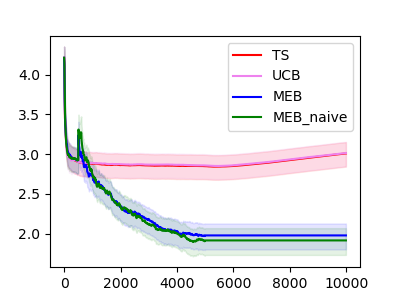
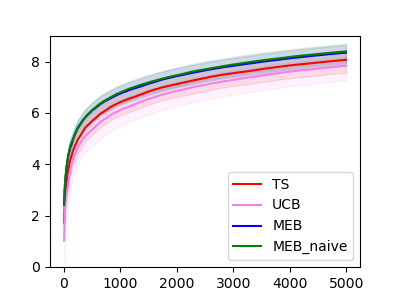

In [40]:
import subprocess

se_list = [0.1, 0.5, 1.0, 2.0]
s_list = [0.01, 0.1, 1.0]

for se in se_list:
    for s in s_list:

        save_name = 'gaussian_p2_se%s_s_%s_warm05'%(str(se), str(s))
        print(save_name)
        subprocess.call(["python", "RunExp.py", '-T', '10000', '-n', '30',
                         '--scale', '1', '--dist_ops', '0', '-d', '5', '--offset', '10',
                        '--save_name', save_name, '--sigma', str(s), '--decay_cut', '0.5',
                         '--sigma_e', str(se), '--ind_S', '500', '-p', '0.5', '--save'])
        with open('Pickle_files/%s.pickle'%(save_name), 'rb') as f:
            results, algs, attr, args = pickle.load(f)
        oPlot = FlowLayout()
        print(args)
        save = True
        plot_error(results, algs, oPlot, 1, save = save, savename = save_name)
        plot_regret(results, algs, oPlot, log = True, upper = 9, save = save, savename = save_name, warmup = 0.5)
        oPlot.PassHtmlToCell()

gaussian_p2_se0.1_s_0.01_warm05_second_run
0 1 2 3 4 5 6 7 8 9 10 11 12 13 14 15 16 17 18 19 20 21 22 23 24 25 26 27 28 29 Namespace(T=10000, d=5, n=30, a=2, p=0.5, l=1.0, offset=10.0, decay=False, decay_tmp=0.3333333333333333, decay_coef=1, decay_cut=0.5, sigma=0.01, sigma_e=0.1, scale=1.0, dist_ops=0, save_name='gaussian_p2_se0.1_s_0.01_warm05_second_run', theta0=[1, 0, 0, 0, 0], theta1=[0, 1, -1, 1, -1], ind_S=500, save=True)
Algorithm TS: 0.043444
Algorithm UCB: 0.042739
Algorithm MEB: 0.044206
Algorithm MEB_naive: 0.037245


/Users/zipingxu/Desktop/Predicted-context/visualization.py:102: RuntimeWarning: invalid value encountered in sqrt
  sd = ((sum2 - mean ** 2) ** 0.5 / (n_experiment))
/Users/zipingxu/Desktop/Predicted-context/visualization.py:108: RuntimeWarning: divide by zero encountered in log
  ax.plot(np.arange(T)[sub], np.log(mean)[sub] , color = colors[alg], markersize=0.2, label = alg)
/Users/zipingxu/Desktop/Predicted-context/visualization.py:108: RuntimeWarning: invalid value encountered in log
  ax.plot(np.arange(T)[sub], np.log(mean)[sub] , color = colors[alg], markersize=0.2, label = alg)
/Users/zipingxu/Desktop/Predicted-context/visualization.py:109: RuntimeWarning: divide by zero encountered in log
  ax.fill_between(np.arange(T)[sub], np.log(mean - sd)[sub], \
/Users/zipingxu/Desktop/Predicted-context/visualization.py:109: RuntimeWarning: invalid value encountered in log
  ax.fill_between(np.arange(T)[sub], np.log(mean - sd)[sub], \
/Users/zipingxu/Desktop/Predicted-context/visualization.


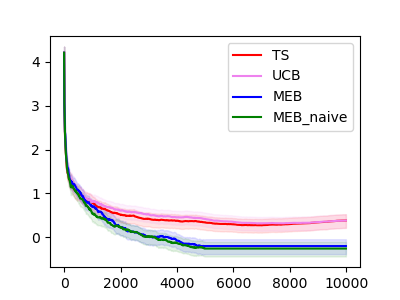
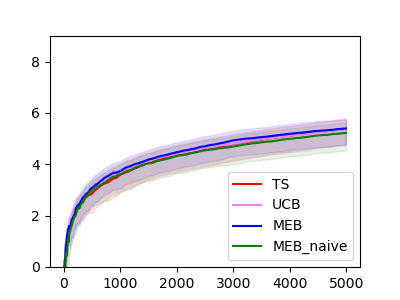

gaussian_p2_se0.1_s_0.1_warm05_second_run
0 1 2 3 4 5 6 7 8 9 10 11 12 13 14 15 16 17 18 19 20 21 22 23 24 25 26 27 28 29 Namespace(T=10000, d=5, n=30, a=2, p=0.5, l=1.0, offset=10.0, decay=False, decay_tmp=0.3333333333333333, decay_coef=1, decay_cut=0.5, sigma=0.1, sigma_e=0.1, scale=1.0, dist_ops=0, save_name='gaussian_p2_se0.1_s_0.1_warm05_second_run', theta0=[1, 0, 0, 0, 0], theta1=[0, 1, -1, 1, -1], ind_S=500, save=True)
Algorithm TS: 0.040224
Algorithm UCB: 0.049847
Algorithm MEB: 0.045770
Algorithm MEB_naive: 0.043314


/Users/zipingxu/Desktop/Predicted-context/visualization.py:102: RuntimeWarning: invalid value encountered in sqrt
  sd = ((sum2 - mean ** 2) ** 0.5 / (n_experiment))
/Users/zipingxu/Desktop/Predicted-context/visualization.py:108: RuntimeWarning: divide by zero encountered in log
  ax.plot(np.arange(T)[sub], np.log(mean)[sub] , color = colors[alg], markersize=0.2, label = alg)
/Users/zipingxu/Desktop/Predicted-context/visualization.py:108: RuntimeWarning: invalid value encountered in log
  ax.plot(np.arange(T)[sub], np.log(mean)[sub] , color = colors[alg], markersize=0.2, label = alg)
/Users/zipingxu/Desktop/Predicted-context/visualization.py:109: RuntimeWarning: divide by zero encountered in log
  ax.fill_between(np.arange(T)[sub], np.log(mean - sd)[sub], \
/Users/zipingxu/Desktop/Predicted-context/visualization.py:109: RuntimeWarning: invalid value encountered in log
  ax.fill_between(np.arange(T)[sub], np.log(mean - sd)[sub], \
/Users/zipingxu/Desktop/Predicted-context/visualization.


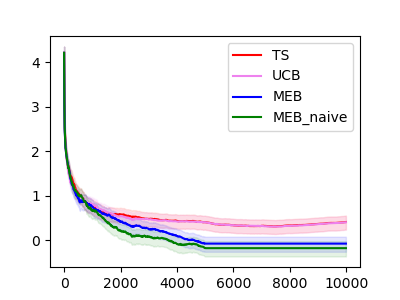
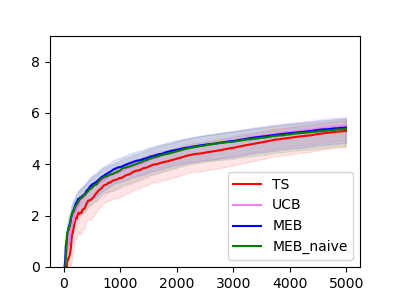

gaussian_p2_se0.1_s_1.0_warm05_second_run
0 1 2 3 4 5 6 7 8 9 10 11 12 13 14 15 16 17 18 19 20 21 22 23 24 25 26 27 28 29 Namespace(T=10000, d=5, n=30, a=2, p=0.5, l=1.0, offset=10.0, decay=False, decay_tmp=0.3333333333333333, decay_coef=1, decay_cut=0.5, sigma=1.0, sigma_e=0.1, scale=1.0, dist_ops=0, save_name='gaussian_p2_se0.1_s_1.0_warm05_second_run', theta0=[1, 0, 0, 0, 0], theta1=[0, 1, -1, 1, -1], ind_S=500, save=True)
Algorithm TS: 0.054776
Algorithm UCB: 0.041309
Algorithm MEB: 0.036635
Algorithm MEB_naive: 0.054316


/Users/zipingxu/Desktop/Predicted-context/visualization.py:108: RuntimeWarning: divide by zero encountered in log
  ax.plot(np.arange(T)[sub], np.log(mean)[sub] , color = colors[alg], markersize=0.2, label = alg)
/Users/zipingxu/Desktop/Predicted-context/visualization.py:109: RuntimeWarning: divide by zero encountered in log
  ax.fill_between(np.arange(T)[sub], np.log(mean - sd)[sub], \
/Users/zipingxu/Desktop/Predicted-context/visualization.py:109: RuntimeWarning: invalid value encountered in log
  ax.fill_between(np.arange(T)[sub], np.log(mean - sd)[sub], \
/Users/zipingxu/Desktop/Predicted-context/visualization.py:110: RuntimeWarning: divide by zero encountered in log
  np.log(mean + sd)[sub], color = colors[alg], alpha=0.1)
/Users/zipingxu/Desktop/Predicted-context/visualization.py:102: RuntimeWarning: invalid value encountered in sqrt
  sd = ((sum2 - mean ** 2) ** 0.5 / (n_experiment))
/Users/zipingxu/Desktop/Predicted-context/visualization.py:108: RuntimeWarning: invalid value en


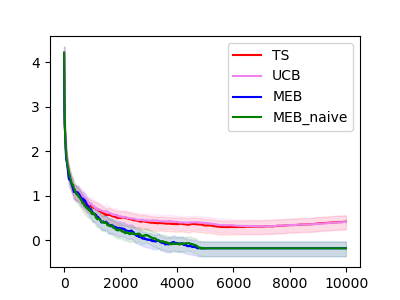
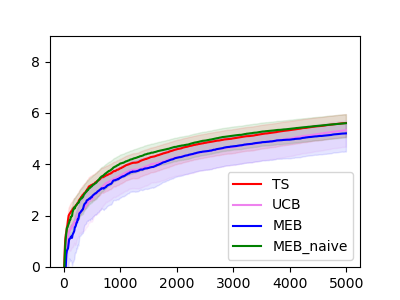

gaussian_p2_se0.5_s_0.01_warm05_second_run
0 1 2 3 4 5 6 7 8 9 10 11 12 13 14 15 16 17 18 19 20 21 22 23 24 25 26 27 28 29 Namespace(T=10000, d=5, n=30, a=2, p=0.5, l=1.0, offset=10.0, decay=False, decay_tmp=0.3333333333333333, decay_coef=1, decay_cut=0.5, sigma=0.01, sigma_e=0.5, scale=1.0, dist_ops=0, save_name='gaussian_p2_se0.5_s_0.01_warm05_second_run', theta0=[1, 0, 0, 0, 0], theta1=[0, 1, -1, 1, -1], ind_S=500, save=True)
Algorithm TS: 0.273923
Algorithm UCB: 0.240448
Algorithm MEB: 0.197880
Algorithm MEB_naive: 0.230193


/Users/zipingxu/Desktop/Predicted-context/visualization.py:108: RuntimeWarning: divide by zero encountered in log
  ax.plot(np.arange(T)[sub], np.log(mean)[sub] , color = colors[alg], markersize=0.2, label = alg)
/Users/zipingxu/Desktop/Predicted-context/visualization.py:109: RuntimeWarning: divide by zero encountered in log
  ax.fill_between(np.arange(T)[sub], np.log(mean - sd)[sub], \
/Users/zipingxu/Desktop/Predicted-context/visualization.py:110: RuntimeWarning: divide by zero encountered in log
  np.log(mean + sd)[sub], color = colors[alg], alpha=0.1)
/Users/zipingxu/Desktop/Predicted-context/visualization.py:109: RuntimeWarning: invalid value encountered in log
  ax.fill_between(np.arange(T)[sub], np.log(mean - sd)[sub], \



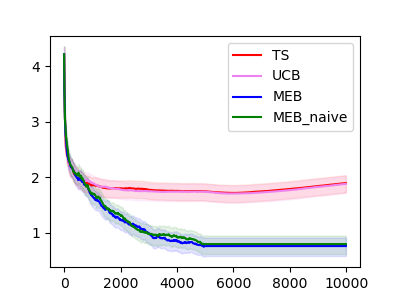
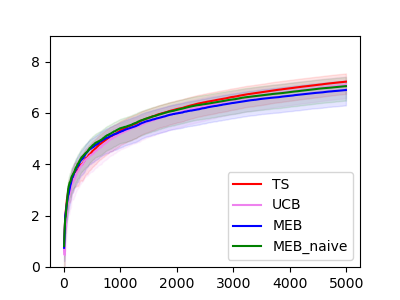

gaussian_p2_se0.5_s_0.1_warm05_second_run
0 1 2 3 4 5 6 7 8 9 10 11 12 13 14 15 16 17 18 19 20 21 22 23 24 25 26 27 28 29 Namespace(T=10000, d=5, n=30, a=2, p=0.5, l=1.0, offset=10.0, decay=False, decay_tmp=0.3333333333333333, decay_coef=1, decay_cut=0.5, sigma=0.1, sigma_e=0.5, scale=1.0, dist_ops=0, save_name='gaussian_p2_se0.5_s_0.1_warm05_second_run', theta0=[1, 0, 0, 0, 0], theta1=[0, 1, -1, 1, -1], ind_S=500, save=True)
Algorithm TS: 0.286466
Algorithm UCB: 0.256727
Algorithm MEB: 0.192533
Algorithm MEB_naive: 0.259066


/Users/zipingxu/Desktop/Predicted-context/visualization.py:108: RuntimeWarning: divide by zero encountered in log
  ax.plot(np.arange(T)[sub], np.log(mean)[sub] , color = colors[alg], markersize=0.2, label = alg)
/Users/zipingxu/Desktop/Predicted-context/visualization.py:109: RuntimeWarning: divide by zero encountered in log
  ax.fill_between(np.arange(T)[sub], np.log(mean - sd)[sub], \
/Users/zipingxu/Desktop/Predicted-context/visualization.py:109: RuntimeWarning: invalid value encountered in log
  ax.fill_between(np.arange(T)[sub], np.log(mean - sd)[sub], \
/Users/zipingxu/Desktop/Predicted-context/visualization.py:110: RuntimeWarning: divide by zero encountered in log
  np.log(mean + sd)[sub], color = colors[alg], alpha=0.1)



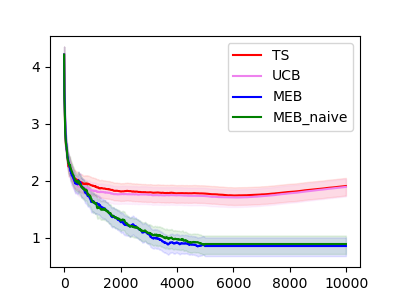
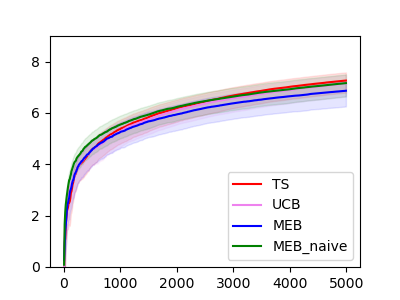

gaussian_p2_se0.5_s_1.0_warm05_second_run
0 1 2 3 4 5 6 7 8 9 10 11 12 13 14 15 16 17 18 19 20 21 22 23 24 25 26 27 28 29 Namespace(T=10000, d=5, n=30, a=2, p=0.5, l=1.0, offset=10.0, decay=False, decay_tmp=0.3333333333333333, decay_coef=1, decay_cut=0.5, sigma=1.0, sigma_e=0.5, scale=1.0, dist_ops=0, save_name='gaussian_p2_se0.5_s_1.0_warm05_second_run', theta0=[1, 0, 0, 0, 0], theta1=[0, 1, -1, 1, -1], ind_S=500, save=True)
Algorithm TS: 0.246731
Algorithm UCB: 0.228171
Algorithm MEB: 0.194606
Algorithm MEB_naive: 0.244584


/Users/zipingxu/Desktop/Predicted-context/visualization.py:102: RuntimeWarning: invalid value encountered in sqrt
  sd = ((sum2 - mean ** 2) ** 0.5 / (n_experiment))
/Users/zipingxu/Desktop/Predicted-context/visualization.py:108: RuntimeWarning: divide by zero encountered in log
  ax.plot(np.arange(T)[sub], np.log(mean)[sub] , color = colors[alg], markersize=0.2, label = alg)
/Users/zipingxu/Desktop/Predicted-context/visualization.py:108: RuntimeWarning: invalid value encountered in log
  ax.plot(np.arange(T)[sub], np.log(mean)[sub] , color = colors[alg], markersize=0.2, label = alg)
/Users/zipingxu/Desktop/Predicted-context/visualization.py:109: RuntimeWarning: divide by zero encountered in log
  ax.fill_between(np.arange(T)[sub], np.log(mean - sd)[sub], \
/Users/zipingxu/Desktop/Predicted-context/visualization.py:110: RuntimeWarning: divide by zero encountered in log
  np.log(mean + sd)[sub], color = colors[alg], alpha=0.1)



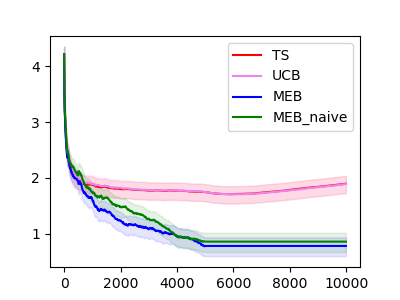
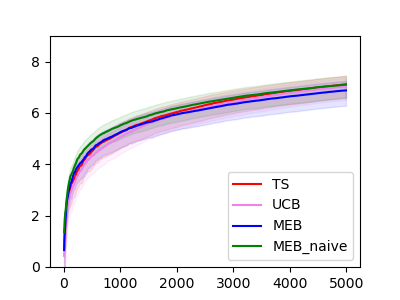

gaussian_p2_se1.0_s_0.01_warm05_second_run
0 1 2 3 4 5 6 7 8 9 10 11 12 13 14 15 16 17 18 19 20 21 22 23 24 25 26 27 28 29 Namespace(T=10000, d=5, n=30, a=2, p=0.5, l=1.0, offset=10.0, decay=False, decay_tmp=0.3333333333333333, decay_coef=1, decay_cut=0.5, sigma=0.01, sigma_e=1.0, scale=1.0, dist_ops=0, save_name='gaussian_p2_se1.0_s_0.01_warm05_second_run', theta0=[1, 0, 0, 0, 0], theta1=[0, 1, -1, 1, -1], ind_S=500, save=True)
Algorithm TS: 0.505686
Algorithm UCB: 0.392474
Algorithm MEB: 0.522025
Algorithm MEB_naive: 0.403564


/Users/zipingxu/Desktop/Predicted-context/visualization.py:108: RuntimeWarning: divide by zero encountered in log
  ax.plot(np.arange(T)[sub], np.log(mean)[sub] , color = colors[alg], markersize=0.2, label = alg)
/Users/zipingxu/Desktop/Predicted-context/visualization.py:109: RuntimeWarning: divide by zero encountered in log
  ax.fill_between(np.arange(T)[sub], np.log(mean - sd)[sub], \
/Users/zipingxu/Desktop/Predicted-context/visualization.py:110: RuntimeWarning: divide by zero encountered in log
  np.log(mean + sd)[sub], color = colors[alg], alpha=0.1)
/Users/zipingxu/Desktop/Predicted-context/visualization.py:109: RuntimeWarning: invalid value encountered in log
  ax.fill_between(np.arange(T)[sub], np.log(mean - sd)[sub], \



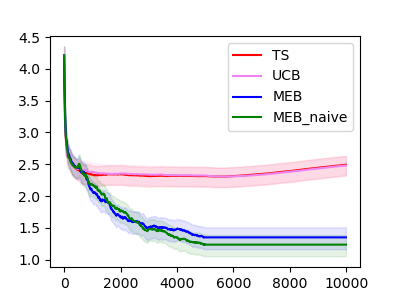
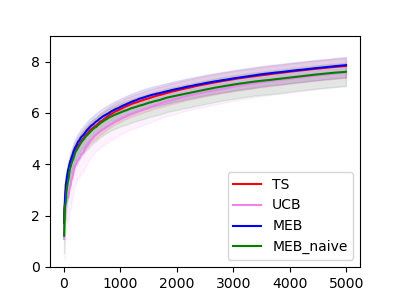

gaussian_p2_se1.0_s_0.1_warm05_second_run
0 1 2 3 4 5 6 7 8 9 10 11 12 13 14 15 16 17 18 19 20 21 22 23 24 25 26 27 28 29 Namespace(T=10000, d=5, n=30, a=2, p=0.5, l=1.0, offset=10.0, decay=False, decay_tmp=0.3333333333333333, decay_coef=1, decay_cut=0.5, sigma=0.1, sigma_e=1.0, scale=1.0, dist_ops=0, save_name='gaussian_p2_se1.0_s_0.1_warm05_second_run', theta0=[1, 0, 0, 0, 0], theta1=[0, 1, -1, 1, -1], ind_S=500, save=True)
Algorithm TS: 0.432309
Algorithm UCB: 0.413865
Algorithm MEB: 0.547663
Algorithm MEB_naive: 0.409756


/Users/zipingxu/Desktop/Predicted-context/visualization.py:102: RuntimeWarning: invalid value encountered in sqrt
  sd = ((sum2 - mean ** 2) ** 0.5 / (n_experiment))
/Users/zipingxu/Desktop/Predicted-context/visualization.py:108: RuntimeWarning: divide by zero encountered in log
  ax.plot(np.arange(T)[sub], np.log(mean)[sub] , color = colors[alg], markersize=0.2, label = alg)
/Users/zipingxu/Desktop/Predicted-context/visualization.py:108: RuntimeWarning: invalid value encountered in log
  ax.plot(np.arange(T)[sub], np.log(mean)[sub] , color = colors[alg], markersize=0.2, label = alg)
/Users/zipingxu/Desktop/Predicted-context/visualization.py:109: RuntimeWarning: divide by zero encountered in log
  ax.fill_between(np.arange(T)[sub], np.log(mean - sd)[sub], \
/Users/zipingxu/Desktop/Predicted-context/visualization.py:109: RuntimeWarning: invalid value encountered in log
  ax.fill_between(np.arange(T)[sub], np.log(mean - sd)[sub], \
/Users/zipingxu/Desktop/Predicted-context/visualization.


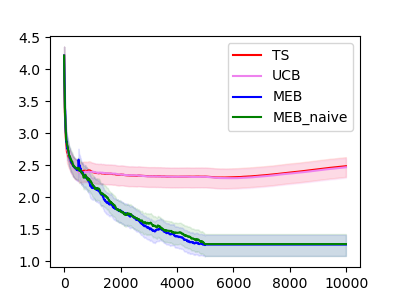
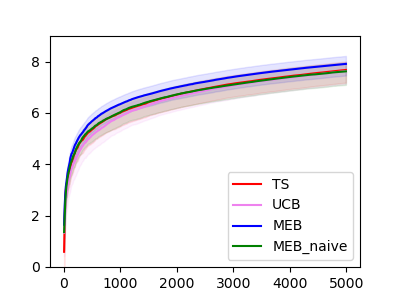

gaussian_p2_se1.0_s_1.0_warm05_second_run
0 1 2 3 4 5 6 7 8 9 10 11 12 13 14 15 16 17 18 19 20 21 22 23 24 25 26 27 28 29 Namespace(T=10000, d=5, n=30, a=2, p=0.5, l=1.0, offset=10.0, decay=False, decay_tmp=0.3333333333333333, decay_coef=1, decay_cut=0.5, sigma=1.0, sigma_e=1.0, scale=1.0, dist_ops=0, save_name='gaussian_p2_se1.0_s_1.0_warm05_second_run', theta0=[1, 0, 0, 0, 0], theta1=[0, 1, -1, 1, -1], ind_S=500, save=True)
Algorithm TS: 0.469099
Algorithm UCB: 0.427217
Algorithm MEB: 0.439256
Algorithm MEB_naive: 0.509513


/Users/zipingxu/Desktop/Predicted-context/visualization.py:108: RuntimeWarning: divide by zero encountered in log
  ax.plot(np.arange(T)[sub], np.log(mean)[sub] , color = colors[alg], markersize=0.2, label = alg)
/Users/zipingxu/Desktop/Predicted-context/visualization.py:109: RuntimeWarning: divide by zero encountered in log
  ax.fill_between(np.arange(T)[sub], np.log(mean - sd)[sub], \
/Users/zipingxu/Desktop/Predicted-context/visualization.py:110: RuntimeWarning: divide by zero encountered in log
  np.log(mean + sd)[sub], color = colors[alg], alpha=0.1)
/Users/zipingxu/Desktop/Predicted-context/visualization.py:102: RuntimeWarning: invalid value encountered in sqrt
  sd = ((sum2 - mean ** 2) ** 0.5 / (n_experiment))
/Users/zipingxu/Desktop/Predicted-context/visualization.py:108: RuntimeWarning: invalid value encountered in log
  ax.plot(np.arange(T)[sub], np.log(mean)[sub] , color = colors[alg], markersize=0.2, label = alg)



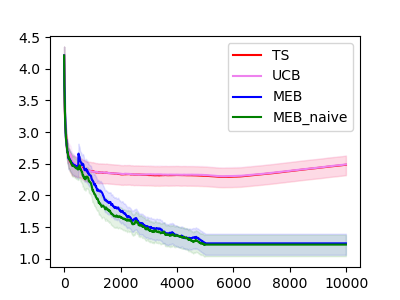
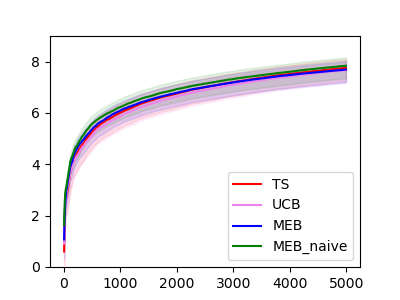

gaussian_p2_se2.0_s_0.01_warm05_second_run
0 1 2 3 4 5 6 7 8 9 10 11 12 13 14 15 16 17 18 19 20 21 22 23 24 25 26 27 28 29 Namespace(T=10000, d=5, n=30, a=2, p=0.5, l=1.0, offset=10.0, decay=False, decay_tmp=0.3333333333333333, decay_coef=1, decay_cut=0.5, sigma=0.01, sigma_e=2.0, scale=1.0, dist_ops=0, save_name='gaussian_p2_se2.0_s_0.01_warm05_second_run', theta0=[1, 0, 0, 0, 0], theta1=[0, 1, -1, 1, -1], ind_S=500, save=True)
Algorithm TS: 0.705566
Algorithm UCB: 0.600780
Algorithm MEB: 0.686228
Algorithm MEB_naive: 0.688079


/Users/zipingxu/Desktop/Predicted-context/visualization.py:108: RuntimeWarning: divide by zero encountered in log
  ax.plot(np.arange(T)[sub], np.log(mean)[sub] , color = colors[alg], markersize=0.2, label = alg)
/Users/zipingxu/Desktop/Predicted-context/visualization.py:109: RuntimeWarning: divide by zero encountered in log
  ax.fill_between(np.arange(T)[sub], np.log(mean - sd)[sub], \
/Users/zipingxu/Desktop/Predicted-context/visualization.py:110: RuntimeWarning: divide by zero encountered in log
  np.log(mean + sd)[sub], color = colors[alg], alpha=0.1)
/Users/zipingxu/Desktop/Predicted-context/visualization.py:102: RuntimeWarning: invalid value encountered in sqrt
  sd = ((sum2 - mean ** 2) ** 0.5 / (n_experiment))
/Users/zipingxu/Desktop/Predicted-context/visualization.py:108: RuntimeWarning: invalid value encountered in log
  ax.plot(np.arange(T)[sub], np.log(mean)[sub] , color = colors[alg], markersize=0.2, label = alg)
/Users/zipingxu/Desktop/Predicted-context/visualization.py:1


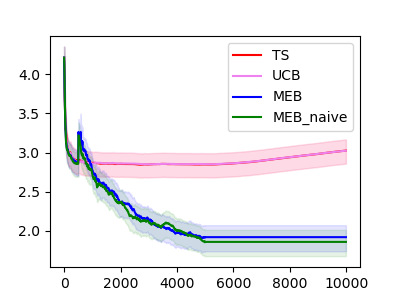
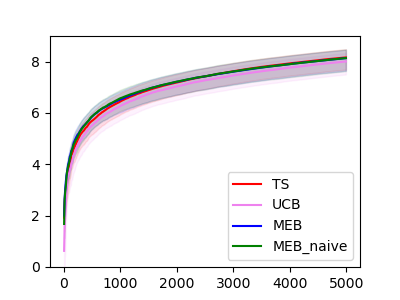

gaussian_p2_se2.0_s_0.1_warm05_second_run
0 1 2 3 4 5 6 7 8 9 10 11 12 13 14 15 16 17 18 19 20 21 22 23 24 25 26 27 28 29 Namespace(T=10000, d=5, n=30, a=2, p=0.5, l=1.0, offset=10.0, decay=False, decay_tmp=0.3333333333333333, decay_coef=1, decay_cut=0.5, sigma=0.1, sigma_e=2.0, scale=1.0, dist_ops=0, save_name='gaussian_p2_se2.0_s_0.1_warm05_second_run', theta0=[1, 0, 0, 0, 0], theta1=[0, 1, -1, 1, -1], ind_S=500, save=True)
Algorithm TS: 0.680480
Algorithm UCB: 0.755933
Algorithm MEB: 0.725421
Algorithm MEB_naive: 0.644354


/Users/zipingxu/Desktop/Predicted-context/visualization.py:108: RuntimeWarning: divide by zero encountered in log
  ax.plot(np.arange(T)[sub], np.log(mean)[sub] , color = colors[alg], markersize=0.2, label = alg)
/Users/zipingxu/Desktop/Predicted-context/visualization.py:109: RuntimeWarning: divide by zero encountered in log
  ax.fill_between(np.arange(T)[sub], np.log(mean - sd)[sub], \
/Users/zipingxu/Desktop/Predicted-context/visualization.py:110: RuntimeWarning: divide by zero encountered in log
  np.log(mean + sd)[sub], color = colors[alg], alpha=0.1)



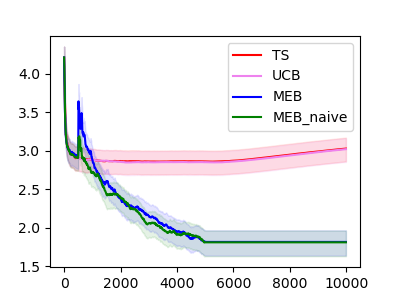
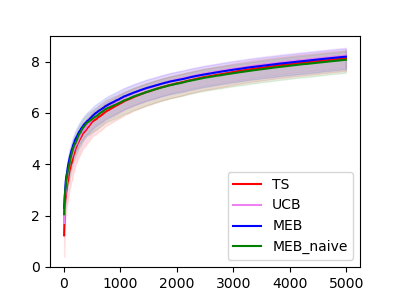

gaussian_p2_se2.0_s_1.0_warm05_second_run
0 1 2 3 4 5 6 7 8 9 10 11 12 13 14 15 16 17 18 19 20 21 22 23 24 25 26 27 28 29 Namespace(T=10000, d=5, n=30, a=2, p=0.5, l=1.0, offset=10.0, decay=False, decay_tmp=0.3333333333333333, decay_coef=1, decay_cut=0.5, sigma=1.0, sigma_e=2.0, scale=1.0, dist_ops=0, save_name='gaussian_p2_se2.0_s_1.0_warm05_second_run', theta0=[1, 0, 0, 0, 0], theta1=[0, 1, -1, 1, -1], ind_S=500, save=True)
Algorithm TS: 0.639972
Algorithm UCB: 0.571421
Algorithm MEB: 0.611889
Algorithm MEB_naive: 0.919492


/Users/zipingxu/Desktop/Predicted-context/visualization.py:102: RuntimeWarning: invalid value encountered in sqrt
  sd = ((sum2 - mean ** 2) ** 0.5 / (n_experiment))
/Users/zipingxu/Desktop/Predicted-context/visualization.py:108: RuntimeWarning: divide by zero encountered in log
  ax.plot(np.arange(T)[sub], np.log(mean)[sub] , color = colors[alg], markersize=0.2, label = alg)
/Users/zipingxu/Desktop/Predicted-context/visualization.py:109: RuntimeWarning: divide by zero encountered in log
  ax.fill_between(np.arange(T)[sub], np.log(mean - sd)[sub], \
/Users/zipingxu/Desktop/Predicted-context/visualization.py:110: RuntimeWarning: divide by zero encountered in log
  np.log(mean + sd)[sub], color = colors[alg], alpha=0.1)
/Users/zipingxu/Desktop/Predicted-context/visualization.py:109: RuntimeWarning: invalid value encountered in log
  ax.fill_between(np.arange(T)[sub], np.log(mean - sd)[sub], \



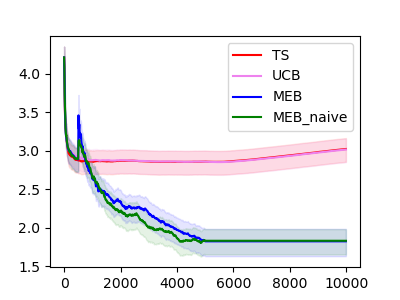
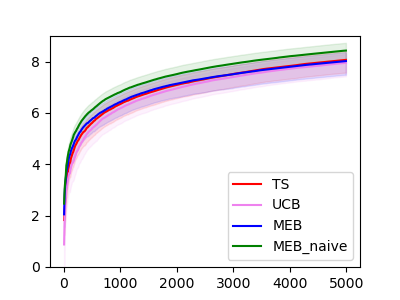

In [41]:
import subprocess

se_list = [0.1, 0.5, 1.0, 2.0]
s_list = [0.01, 0.1, 1.0]

for se in se_list:
    for s in s_list:

        save_name = 'gaussian_p2_se%s_s_%s_warm05_second_run'%(str(se), str(s))
        print(save_name)
        subprocess.call(["python", "RunExp.py", '-T', '10000', '-n', '30',
                         '--scale', '1', '--dist_ops', '0', '-d', '5', '--offset', '10',
                        '--save_name', save_name, '--sigma', str(s), '--decay_cut', '0.5',
                         '--sigma_e', str(se), '--ind_S', '500', '-p', '0.5', '--save'])
        with open('Pickle_files/%s.pickle'%(save_name), 'rb') as f:
            results, algs, attr, args = pickle.load(f)
        oPlot = FlowLayout()
        print(args)
        save = True
        plot_error(results, algs, oPlot, 1, save = save, savename = save_name)
        plot_regret(results, algs, oPlot, log = True, upper = 9, save = save, savename = save_name, warmup = 0.5)
        oPlot.PassHtmlToCell()

In [ ]:
import subprocess
subprocess.call(["python", "RunExp.py", '-T', '10000', '-n', '30',
                 '--scale', '1', '--dist_ops', '0', '-d', '5', '--offset', '10',
                '--save_name', 'gaussian_p2_se05_s_001', '--sigma', '0.01',# '--decay_cut', '0.5',
                 '--sigma_e', '0.5', '--ind_S', '500', '-p', '0.2', '--save'])

0 1 2 Namespace(T=10000, d=5, n=3, a=2, p=0.2, l=1.0, offset=10.0, decay=False, decay_tmp=0.3333333333333333, decay_coef=1, decay_cut=0.0, sigma=0.01, sigma_e=5.0, scale=1.0, dist_ops=0, save_name='gaussian_scale_1_p_1', theta0=[1, 0, 0, 0, 0], theta1=[0, 1, -1, 1, -1], ind_S=500, save=True)
Algorithm TS: 0.090460
Algorithm UCB: 0.080829
Algorithm MEB: 0.062782
Algorithm MEB_naive: 0.073611


/Users/zipingxu/Desktop/Predicted-context/visualization.py:108: RuntimeWarning: divide by zero encountered in log
  ax.plot(np.arange(T)[sub], np.log(mean)[sub] , color = colors[alg], markersize=0.2, label = alg)
/Users/zipingxu/Desktop/Predicted-context/visualization.py:109: RuntimeWarning: divide by zero encountered in log
  ax.fill_between(np.arange(T)[sub], np.log(mean - sd)[sub], \
/Users/zipingxu/Desktop/Predicted-context/visualization.py:109: RuntimeWarning: invalid value encountered in log
  ax.fill_between(np.arange(T)[sub], np.log(mean - sd)[sub], \
/Users/zipingxu/Desktop/Predicted-context/visualization.py:110: RuntimeWarning: divide by zero encountered in log
  np.log(mean + sd)[sub], color = colors[alg], alpha=0.1)
/Users/zipingxu/Desktop/Predicted-context/visualization.py:102: RuntimeWarning: invalid value encountered in sqrt
  sd = ((sum2 - mean ** 2) ** 0.5 / (n_experiment))
/Users/zipingxu/Desktop/Predicted-context/visualization.py:108: RuntimeWarning: invalid value en


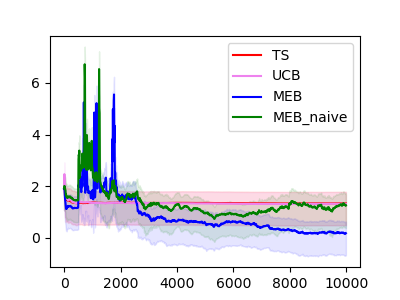
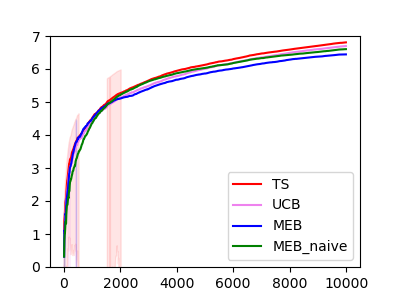

In [16]:
import subprocess
subprocess.call(["python", "RunExp.py", '-T', '10000', '-n', '3',
                 '--scale', '1', '--dist_ops', '0', '-d', '5', '--offset', '10',
                '--save_name', 'gaussian_scale_1_p_1', '--sigma', '0.01',# '--decay_cut', '0.5',
                 '--sigma_e', '5.0', '--ind_S', '500', '-p', '0.2', '--save'])
with open('Pickle_files/gaussian_scale_1_p_1.pickle', 'rb') as f:
    results, algs, attr, args = pickle.load(f)
oPlot = FlowLayout()
print(args)
save = True
plot_error(results, algs, oPlot, 1, save = save, savename = 'gaussian_p_1')
plot_regret(results, algs, oPlot, log = True, upper = 7, save = save, savename = 'gaussian_p_1')
oPlot.PassHtmlToCell()

In [7]:
import subprocess
subprocess.call(["python", "RunExp.py", '-T', '10000', '-n', '3',
                 '--scale', '1', '--dist_ops', '0', '-d', '5', '--offset', '10',
                '--save_name', 'gaussian_scale_1_p_1', '--sigma', '0.1', '--decay_cut', '0.5',
                 '--sigma_e', '0.25', '--ind_S', '500', '-p', '0.3', '--save'])

0 1 2 

0

Namespace(T=10000, d=5, n=3, a=2, p=0.3, l=1.0, offset=10.0, decay=False, decay_tmp=0.3333333333333333, decay_coef=1, decay_cut=0.5, sigma=0.1, sigma_e=0.25, scale=1.0, dist_ops=0, save_name='gaussian_scale_1_p_1', theta0=[1, 0, 0, 0, 0], theta1=[0, 1, -1, 1, -1], ind_S=500, save=True)
Algorithm TS: 0.013403
Algorithm UCB: 0.019689
Algorithm MEB: 0.007524
Algorithm MEB_naive: 0.010021


/Users/zipingxu/Desktop/Predicted-context/visualization.py:102: RuntimeWarning: invalid value encountered in sqrt
  sd = ((sum2 - mean ** 2) ** 0.5 / (n_experiment))
/Users/zipingxu/Desktop/Predicted-context/visualization.py:108: RuntimeWarning: divide by zero encountered in log
  ax.plot(np.arange(T)[sub], np.log(mean)[sub] , color = colors[alg], markersize=0.2, label = alg)
/Users/zipingxu/Desktop/Predicted-context/visualization.py:108: RuntimeWarning: invalid value encountered in log
  ax.plot(np.arange(T)[sub], np.log(mean)[sub] , color = colors[alg], markersize=0.2, label = alg)
/Users/zipingxu/Desktop/Predicted-context/visualization.py:109: RuntimeWarning: divide by zero encountered in log
  ax.fill_between(np.arange(T)[sub], np.log(mean - sd)[sub], \
/Users/zipingxu/Desktop/Predicted-context/visualization.py:109: RuntimeWarning: invalid value encountered in log
  ax.fill_between(np.arange(T)[sub], np.log(mean - sd)[sub], \
/Users/zipingxu/Desktop/Predicted-context/visualization.


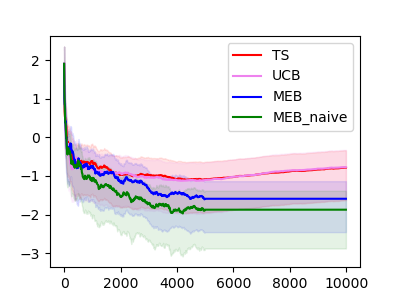
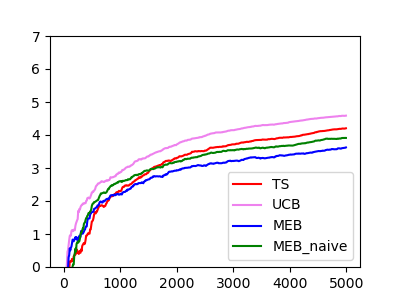

In [2]:
with open('Pickle_files/gaussian_scale_1_p_1.pickle', 'rb') as f:
    results, algs, attr, args = pickle.load(f)
oPlot = FlowLayout()
print(args)
save = True
plot_error(results, algs, oPlot, 1, save = save, savename = 'gaussian_p_1')
plot_regret(results, algs, oPlot, log = True, upper = 7, save = save, savename = 'gaussian_p_1', warmup = 0.5)
oPlot.PassHtmlToCell()

0 1 2 3 4 5 6 7 8 9 Namespace(T=50000, d=5, n=10, a=2, p=0.05, decay=False, decay_tmp=0.3333333333333333, decay_coef=1, decay_cut=0.0, sigma=0.1, sigma_e=0.25, scale=1.0, dist_ops=0, save_name='gaussian_scale_1_p_05', theta0=[1, 0, 0, 0, 0], theta1=[0, 1, -1, 1, -1], ind_S=500, save=True)
Algorithm TS: 66.371334
Algorithm UCB: 56.608323
Algorithm MEB: 38.473323
Algorithm MEB_naive: 258.936280


/Users/zipingxu/Desktop/Predicted-context/visualization.py:98: RuntimeWarning: divide by zero encountered in log
  ax.plot(np.arange(T)[sub], np.log(mean)[sub] , color = colors[alg], markersize=0.2, label = alg)
/Users/zipingxu/Desktop/Predicted-context/visualization.py:99: RuntimeWarning: divide by zero encountered in log
  ax.fill_between(np.arange(T)[sub], np.log(mean - sd)[sub], \
/Users/zipingxu/Desktop/Predicted-context/visualization.py:100: RuntimeWarning: divide by zero encountered in log
  np.log(mean + sd)[sub], color = colors[alg], alpha=0.1)



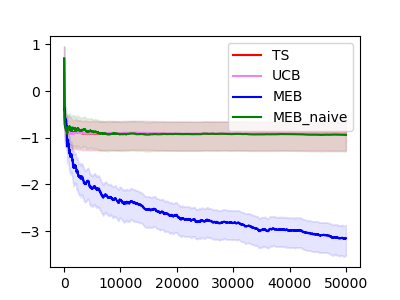
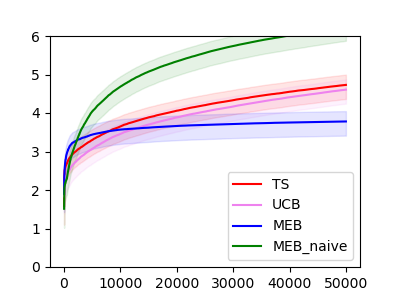

In [4]:
import subprocess
subprocess.call(["python", "RunExp.py", '-T', '50000', '-n', '10',
                 '--scale', '1', '--dist_ops', '0', '-d', '5',
                '--save_name', 'gaussian_scale_1_p_05', '--sigma', '0.1',
                 '--sigma_e', '0.25', '--ind_S', '500', '-p', '0.05', '--save'])
with open('Pickle_files/gaussian_scale_1_p_05.pickle', 'rb') as f:
    results, algs, attr, args = pickle.load(f)
oPlot = FlowLayout()
print(args)
save = True
plot_error(results, algs, oPlot, 1, save = save, savename='gaussian_p_05')
plot_regret(results, algs, oPlot, log = True, upper = 6, save = save, savename='gaussian_p_05')
oPlot.PassHtmlToCell()

0 1 2 3 4 5 6 7 8 9 Namespace(T=50000, d=5, n=10, a=2, p=0.2, decay=False, decay_tmp=0.3333333333333333, decay_coef=1, decay_cut=0.0, sigma=0.1, sigma_e=0.25, scale=1.0, dist_ops=0, save_name='gaussian_scale_1_p_2', theta0=[1, 0, 0, 0, 0], theta1=[0, 1, -1, 1, -1], ind_S=500, save=True)
Algorithm TS: 47.592150
Algorithm UCB: 45.563997
Algorithm MEB: 13.998671
Algorithm MEB_naive: 29.493235


/Users/zipingxu/Desktop/Predicted-context/visualization.py:98: RuntimeWarning: divide by zero encountered in log
  ax.plot(np.arange(T)[sub], np.log(mean)[sub] , color = colors[alg], markersize=0.2, label = alg)
/Users/zipingxu/Desktop/Predicted-context/visualization.py:99: RuntimeWarning: divide by zero encountered in log
  ax.fill_between(np.arange(T)[sub], np.log(mean - sd)[sub], \
/Users/zipingxu/Desktop/Predicted-context/visualization.py:100: RuntimeWarning: divide by zero encountered in log
  np.log(mean + sd)[sub], color = colors[alg], alpha=0.1)



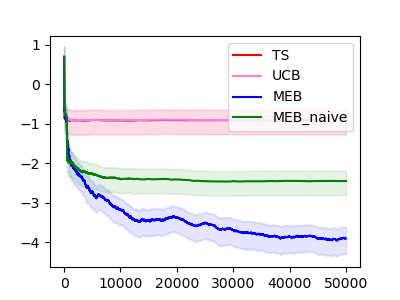
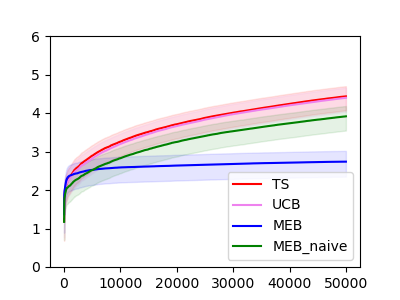

In [10]:
import subprocess
subprocess.call(["python", "RunExp.py", '-T', '50000', '-n', '10',
                 '--scale', '1', '--dist_ops', '0', '-d', '5',
                '--save_name', 'gaussian_scale_1_p_2', '--sigma', '0.1',
                 '--sigma_e', '0.25', '--ind_S', '500', '-p', '0.2', '--save'])
with open('Pickle_files/gaussian_scale_1_p_2.pickle', 'rb') as f:
    results, algs, attr, args = pickle.load(f)
oPlot = FlowLayout()
print(args)
save = True
plot_error(results, algs, oPlot, 1, save = save, savename='gaussian_p_2')
plot_regret(results, algs, oPlot, log = True, upper = 6, save = save, savename='gaussian_p_2')
oPlot.PassHtmlToCell()

0 1 2 3 4 5 6 7 8 9 Namespace(T=50000, d=5, n=10, a=2, p=0.1, decay=False, decay_tmp=0.3333333333333333, decay_coef=1, decay_cut=0.0, sigma=0.1, sigma_e=0.25, scale=1.0, dist_ops=3, save_name='t_p_1', theta0=[1, 0, 0, 0, 0], theta1=[0, 1, -1, 1, -1], ind_S=500, save=True)
Algorithm TS: 150.554939
Algorithm UCB: 141.511837
Algorithm MEB: 84.405059
Algorithm MEB_naive: 182.622252


/Users/zipingxu/Desktop/Predicted-context/visualization.py:98: RuntimeWarning: divide by zero encountered in log
  ax.plot(np.arange(T)[sub], np.log(mean)[sub] , color = colors[alg], markersize=0.2, label = alg)
/Users/zipingxu/Desktop/Predicted-context/visualization.py:99: RuntimeWarning: divide by zero encountered in log
  ax.fill_between(np.arange(T)[sub], np.log(mean - sd)[sub], \
/Users/zipingxu/Desktop/Predicted-context/visualization.py:100: RuntimeWarning: divide by zero encountered in log
  np.log(mean + sd)[sub], color = colors[alg], alpha=0.1)



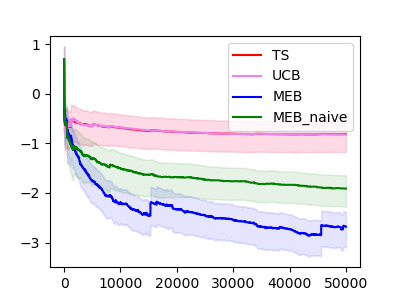
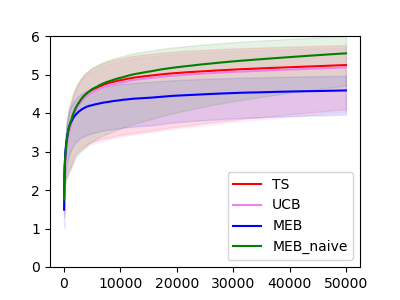

In [7]:
import subprocess
subprocess.call(["python", "RunExp.py", '-T', '50000', '-n', '10',
                 '--scale', '1', '--dist_ops', '3', '-d', '5',
                '--save_name', 't_p_1', '--sigma', '0.1',
                 '--sigma_e', '0.25', '--ind_S', '500', '-p', '0.1', '--save'])
with open('Pickle_files/t_p_1.pickle', 'rb') as f:
    results, algs, attr, args = pickle.load(f)
oPlot = FlowLayout()
print(args)
save = True
plot_error(results, algs, oPlot, 1, save = save, savename = 't_p_1')
plot_regret(results, algs, oPlot, log = True, upper = 6, save = save, savename = 't_p_1')
oPlot.PassHtmlToCell()

0 1 2 3 4 5 6 7 8 9 Namespace(T=50000, d=5, n=10, a=2, p=0.05, decay=False, decay_tmp=0.3333333333333333, decay_coef=1, decay_cut=0.0, sigma=0.1, sigma_e=0.25, scale=1.0, dist_ops=3, save_name='t_p_05', theta0=[1, 0, 0, 0, 0], theta1=[0, 1, -1, 1, -1], ind_S=500, save=True)
Algorithm TS: 42.733013
Algorithm UCB: 39.801442
Algorithm MEB: 62.287026
Algorithm MEB_naive: 148.262206


/Users/zipingxu/Desktop/Predicted-context/visualization.py:98: RuntimeWarning: divide by zero encountered in log
  ax.plot(np.arange(T)[sub], np.log(mean)[sub] , color = colors[alg], markersize=0.2, label = alg)
/Users/zipingxu/Desktop/Predicted-context/visualization.py:99: RuntimeWarning: divide by zero encountered in log
  ax.fill_between(np.arange(T)[sub], np.log(mean - sd)[sub], \
/Users/zipingxu/Desktop/Predicted-context/visualization.py:100: RuntimeWarning: divide by zero encountered in log
  np.log(mean + sd)[sub], color = colors[alg], alpha=0.1)



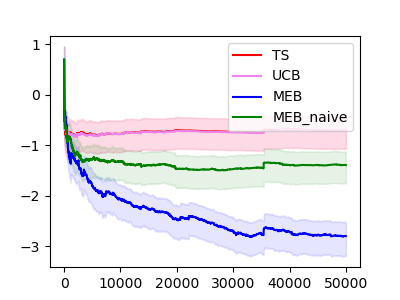
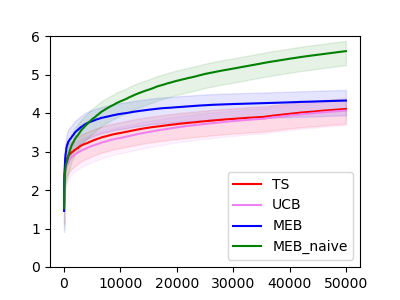

In [9]:
import subprocess
subprocess.call(["python", "RunExp.py", '-T', '50000', '-n', '10',
                 '--scale', '1', '--dist_ops', '3', '-d', '5',
                '--save_name', 't_p_05', '--sigma', '0.1',
                 '--sigma_e', '0.25', '--ind_S', '500', '-p', '0.05', '--save'])
with open('Pickle_files/t_p_05.pickle', 'rb') as f:
    results, algs, attr, args = pickle.load(f)
oPlot = FlowLayout()
print(args)
save = True
plot_error(results, algs, oPlot, 1, save = save, savename = 't_p_05')
plot_regret(results, algs, oPlot, log = True, upper = 6, save = save, savename = 't_p_05')
oPlot.PassHtmlToCell()

0 1 2 3 4 5 6 7 8 9 Namespace(T=50000, d=5, n=10, a=2, p=0.2, decay=False, decay_tmp=0.3333333333333333, decay_coef=1, decay_cut=0.0, sigma=0.1, sigma_e=0.25, scale=1.0, dist_ops=3, save_name='t_p_2', theta0=[1, 0, 0, 0, 0], theta1=[0, 1, -1, 1, -1], ind_S=500, save=True)
Algorithm TS: 51.138186
Algorithm UCB: 61.891714
Algorithm MEB: 29.212257
Algorithm MEB_naive: 60.742665


/Users/zipingxu/Desktop/Predicted-context/visualization.py:98: RuntimeWarning: divide by zero encountered in log
  ax.plot(np.arange(T)[sub], np.log(mean)[sub] , color = colors[alg], markersize=0.2, label = alg)
/Users/zipingxu/Desktop/Predicted-context/visualization.py:99: RuntimeWarning: divide by zero encountered in log
  ax.fill_between(np.arange(T)[sub], np.log(mean - sd)[sub], \
/Users/zipingxu/Desktop/Predicted-context/visualization.py:100: RuntimeWarning: divide by zero encountered in log
  np.log(mean + sd)[sub], color = colors[alg], alpha=0.1)
/Users/zipingxu/Desktop/Predicted-context/visualization.py:99: RuntimeWarning: invalid value encountered in log
  ax.fill_between(np.arange(T)[sub], np.log(mean - sd)[sub], \



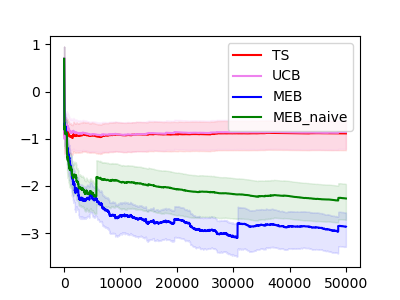
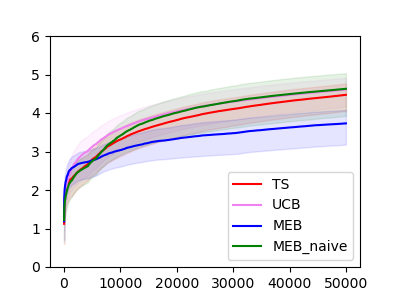

In [11]:
import subprocess
subprocess.call(["python", "RunExp.py", '-T', '50000', '-n', '10',
                 '--scale', '1', '--dist_ops', '3', '-d', '5',
                '--save_name', 't_p_2', '--sigma', '0.1',
                 '--sigma_e', '0.25', '--ind_S', '500', '-p', '0.2', '--save'])
with open('Pickle_files/t_p_2.pickle', 'rb') as f:
    results, algs, attr, args = pickle.load(f)
oPlot = FlowLayout()
print(args)
save = True
plot_error(results, algs, oPlot, 1, save = save, savename = 't_p_2')
plot_regret(results, algs, oPlot, log = True, upper = 6, save = save, savename = 't_p_2')
oPlot.PassHtmlToCell()

## Simple Regret Setting

0 1 2 3 4 5 6 7 8 9 Namespace(T=20000, d=5, n=10, a=2, p=0.2, decay=False, decay_tmp=0.3333333333333333, decay_coef=1, decay_cut=0.5, sigma=0.1, sigma_e=0.25, scale=1.0, dist_ops=0, save_name='temp', theta0=[1, 0, 0, 0, 0], theta1=[0, 1, -1, 1, -1], ind_S=100, save=True)
Algorithm TS: 17.612710
Algorithm UCB: 17.175491
Algorithm MEB: 1.812013
Algorithm MEB_naive: 10.012046


/Users/zipingxu/Desktop/Predicted-context/visualization.py:98: RuntimeWarning: divide by zero encountered in log
  ax.plot(np.arange(T)[sub], np.log(mean)[sub] , color = colors[alg], markersize=0.2, label = alg)
/Users/zipingxu/Desktop/Predicted-context/visualization.py:99: RuntimeWarning: divide by zero encountered in log
  ax.fill_between(np.arange(T)[sub], np.log(mean - sd)[sub], \
/Users/zipingxu/Desktop/Predicted-context/visualization.py:99: RuntimeWarning: invalid value encountered in log
  ax.fill_between(np.arange(T)[sub], np.log(mean - sd)[sub], \
/Users/zipingxu/Desktop/Predicted-context/visualization.py:100: RuntimeWarning: divide by zero encountered in log
  np.log(mean + sd)[sub], color = colors[alg], alpha=0.1)



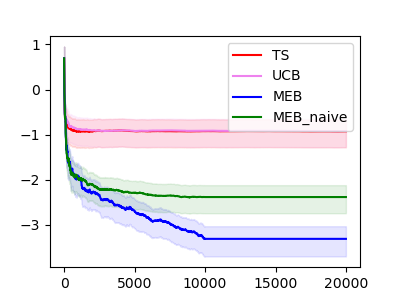
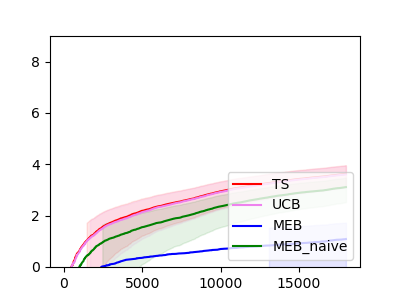

In [12]:
import subprocess
subprocess.call(["python", "RunExp.py", '-T', '20000', '-n', '10',
                 '--scale', '1', '--dist_ops', '0', '-d', '5',
                '--save_name', 'temp', '--sigma', '0.1',
                 '--sigma_e', '0.25', '--ind_S', '100', '-p', '0.2', 
                 '--decay_cut', '0.5',
                 '--save'])

Namespace(T=20000, d=5, n=10, a=2, p=0.2, decay=False, decay_tmp=0.3333333333333333, decay_coef=1, decay_cut=0.5, sigma=0.1, sigma_e=0.25, scale=1.0, dist_ops=0, save_name='temp', theta0=[1, 0, 0, 0, 0], theta1=[0, 1, -1, 1, -1], ind_S=100, save=True)
Algorithm TS: 0.002378
Algorithm UCB: 0.002333
Algorithm MEB: 0.000123
Algorithm MEB_naive: 0.001497


/Users/zipingxu/Desktop/Predicted-context/visualization.py:98: RuntimeWarning: divide by zero encountered in log
  ax.plot(np.arange(T)[sub], np.log(mean)[sub] , color = colors[alg], markersize=0.2, label = alg)
/Users/zipingxu/Desktop/Predicted-context/visualization.py:99: RuntimeWarning: divide by zero encountered in log
  ax.fill_between(np.arange(T)[sub], np.log(mean - sd)[sub], \
/Users/zipingxu/Desktop/Predicted-context/visualization.py:99: RuntimeWarning: invalid value encountered in log
  ax.fill_between(np.arange(T)[sub], np.log(mean - sd)[sub], \
/Users/zipingxu/Desktop/Predicted-context/visualization.py:100: RuntimeWarning: divide by zero encountered in log
  np.log(mean + sd)[sub], color = colors[alg], alpha=0.1)



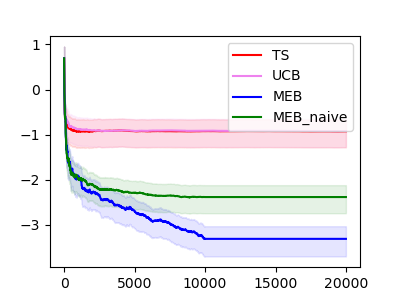
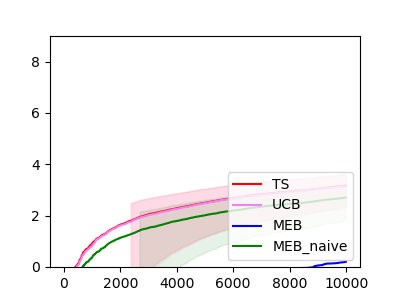

In [2]:
with open('Pickle_files/temp.pickle', 'rb') as f:
    results, algs, attr, args = pickle.load(f)
oPlot = FlowLayout()
print(args)
plot_error(results, algs, oPlot, 1)
plot_regret(results, algs, oPlot, log = True, upper = 9, warmup = 0.5)
oPlot.PassHtmlToCell()

0 1 2 3 4 5 6 7 8 9 Namespace(T=20000, d=5, n=10, a=2, p=0.2, decay=False, decay_tmp=0.3333333333333333, decay_coef=1, decay_cut=0.5, sigma=0.1, sigma_e=0.25, scale=1.0, dist_ops=3, save_name='temp', theta0=[1, 0, 0, 0, 0], theta1=[0, 1, -1, 1, -1], ind_S=100, save=True)
Algorithm TS: 0.001808
Algorithm UCB: 0.001630
Algorithm MEB: 0.000617
Algorithm MEB_naive: 0.001662


/Users/zipingxu/Desktop/Predicted-context/visualization.py:98: RuntimeWarning: divide by zero encountered in log
  ax.plot(np.arange(T)[sub], np.log(mean)[sub] , color = colors[alg], markersize=0.2, label = alg)
/Users/zipingxu/Desktop/Predicted-context/visualization.py:99: RuntimeWarning: divide by zero encountered in log
  ax.fill_between(np.arange(T)[sub], np.log(mean - sd)[sub], \
/Users/zipingxu/Desktop/Predicted-context/visualization.py:99: RuntimeWarning: invalid value encountered in log
  ax.fill_between(np.arange(T)[sub], np.log(mean - sd)[sub], \
/Users/zipingxu/Desktop/Predicted-context/visualization.py:100: RuntimeWarning: divide by zero encountered in log
  np.log(mean + sd)[sub], color = colors[alg], alpha=0.1)



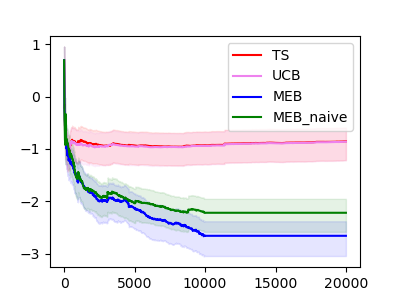
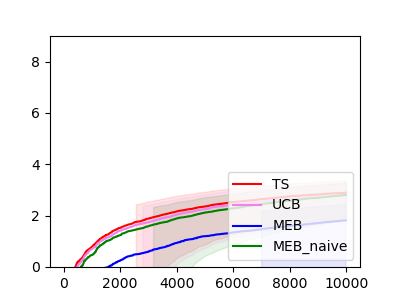

In [3]:
import subprocess
subprocess.call(["python", "RunExp.py", '-T', '20000', '-n', '10',
                 '--scale', '1', '--dist_ops', '3', '-d', '5',
                '--save_name', 'temp', '--sigma', '0.1',
                 '--sigma_e', '0.25', '--ind_S', '100', '-p', '0.2', 
                 '--decay_cut', '0.5',
                 '--save'])
with open('Pickle_files/temp.pickle', 'rb') as f:
    results, algs, attr, args = pickle.load(f)
oPlot = FlowLayout()
print(args)
plot_error(results, algs, oPlot, 1)
plot_regret(results, algs, oPlot, log = True, upper = 9, warmup = 0.5)
oPlot.PassHtmlToCell()

0 1 2 Namespace(T=50001, d=5, n=3, a=2, p=0.0, decay=True, decay_tmp=0.33, decay_coef=0.1, sigma=0.1, sigma_e=0.25, scale=1.0, dist_ops=0, save_name='temp', theta0=[1, 0, 0, 0, 0], theta1=[0, 1, -1, 1, -1], ind_S=100, save=True)



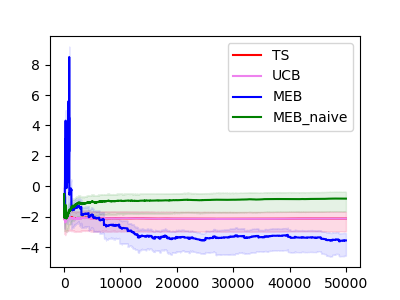
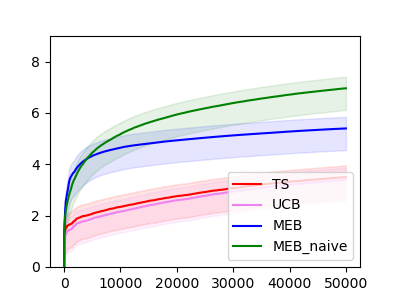

In [50]:
import subprocess
subprocess.call(["python", "RunExp.py", '-n', '3',
                 '--scale', '1', '--dist_ops', '0', '-d', '5',
                '--save_name', 'temp', '--sigma', '0.1',
                 '--sigma_e', '0.25', '--ind_S', '100', '-p', '0.', 
                 '--decay', '--decay_tmp', '0.33', '--decay_coef', '0.1',
                 '--save'])
with open('Pickle_files/temp.pickle', 'rb') as f:
    results, algs, attr, args = pickle.load(f)
oPlot = FlowLayout()
print(args)
plot_error(results, algs, oPlot, 1)
plot_regret(results, algs, oPlot, log = True, upper = 9)
oPlot.PassHtmlToCell()